**Context**

An over-the-top (OTT) media service is a media service offered directly to viewers via the internet. The term is most synonymous with subscription-based video-on-demand services that offer access to film and television content, including existing series acquired from other producers, as well as original content produced specifically for the service. They are typically accessed via websites on personal computers, apps on smartphones and tablets, or televisions with integrated Smart TV platforms.

Presently, OTT services are at a relatively nascent stage and are widely accepted as a trending technology across the globe. With the increasing change in customers' social behavior, which is shifting from traditional subscriptions to broadcasting services and OTT on-demand video and music subscriptions every year, OTT streaming is expected to grow at a very fast pace. The global OTT market size was valued at 121.61 billion dollars in 2019 and is projected to reach 1,039.03 billion dollars by 2027, growing at a CAGR of 29.4% from 2020 to 2027. The shift from television to OTT services for entertainment is driven by benefits such as on-demand services, ease of access, and access to better networks and digital connectivity.

With the outbreak of COVID19, OTT services are striving to meet the growing entertainment appetite of viewers, with some platforms already experiencing a 46% increase in consumption and subscriber count as viewers seek fresh content. With innovations and advanced transformations, which will enable the customers to access everything they want in a single space, OTT platforms across the world are expected to increasingly attract subscribers on a concurrent basis.

**Objective**

ShowTime is an OTT service provider and offers a wide variety of content (movies, web shows, etc.) for its users. They want to determine the driver variables for first-day content viewership so that they can take necessary measures to improve the viewership of the content on their platform. Some of the reasons for the decline in viewership of content would be the decline in the number of people coming to the platform, decreased marketing spend, content timing clashes, weekends and holidays, etc. They have hired you as a Data Scientist, shared the data of the current content in their platform, and asked you to analyze the data and come up with a linear regression model to determine the driving factors for first-day viewership.

**Data Description**

The data contains the different factors to analyze for the content. The detailed data dictionary is ws, in millions, of the content

# 1 Sanity Checks

## Data Dictionary

1. **visitors**: Average number of visitors, in millions, to the platform in the past week.
2. **ad_impressions**: Number of ad impressions, in millions, across all ad campaigns for the content (both running and completed).
3. **major_sports_event**: Indicates if there was any major sports event on the day.
4. **genre**: Genre of the content.
5. **dayofweek**: Day of the week on which the content was released.
6. **season**: Season during which the content was released.
7. **views_trailer**: Number of views, in millions, of the content trailer.
8. **views_content**: Number of first-day views, in millions, of the content.

In [2251]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2252]:
df = pd.read_csv('D:/Data Science/Module -3_Linear_Regression/ottdata.csv')
df.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


In [2253]:
df.shape

(1000, 8)

In [2254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [2255]:

df['major_sports_event'] = df['major_sports_event'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   object 
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), object(4)
memory usage: 62.6+ KB


In [2256]:
df['major_sports_event'].value_counts()

major_sports_event
0    600
1    400
Name: count, dtype: int64

In [2257]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
visitors,1000.0,1.70429,0.231973,1.25,1.5500,1.70,1.830,2.34
ad_impressions,1000.0,1434.71229,289.534834,1010.87,1210.3300,1383.58,1623.670,2424.20
views_trailer,1000.0,66.91559,35.001080,30.08,50.9475,53.96,57.755,199.92
views_content,1000.0,0.47340,0.105914,0.22,0.4000,0.45,0.520,0.89


# 2 **Exploratory Data Analysis**

## 2.1 **Univariate Analysis**

In [2260]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="red"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="yellow", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="green", linestyle="-"
    )  # Add median to the histogram

In [2261]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 10))
    else:
        plt.figure(figsize=(n + 2, 10))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage


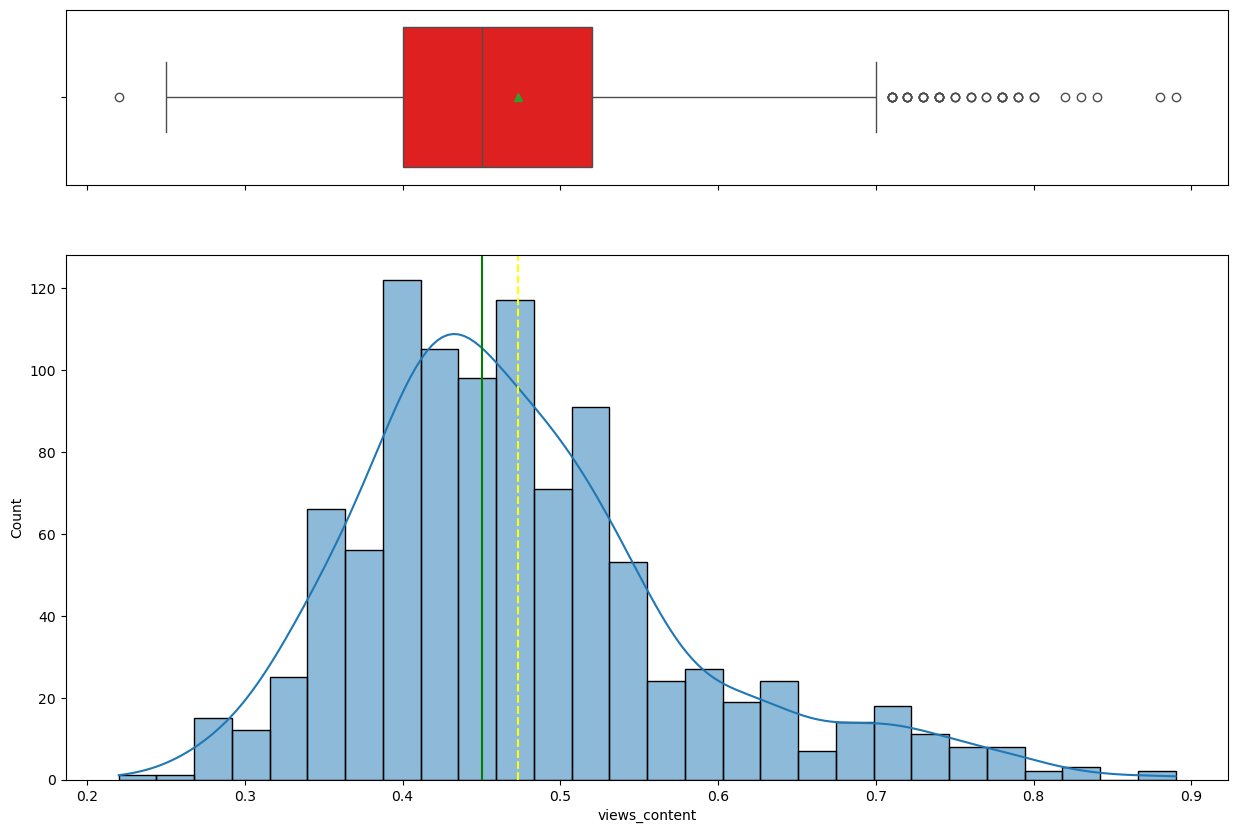

In [2262]:
histogram_boxplot(df,'views_content',kde=True)
plt.savefig('Downloads/1.jpg')

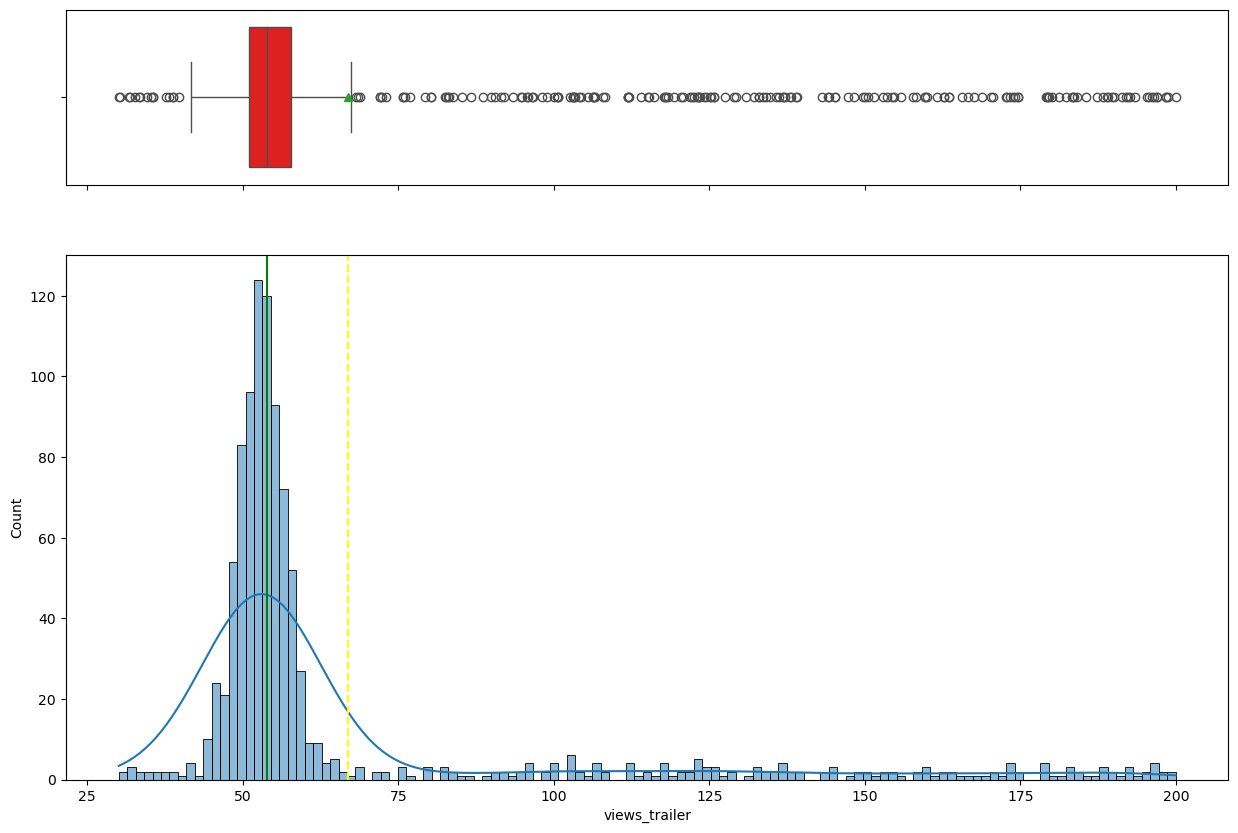

In [2263]:
histogram_boxplot(df,'views_trailer',kde=True)
plt.savefig('Downloads/2.jpg')

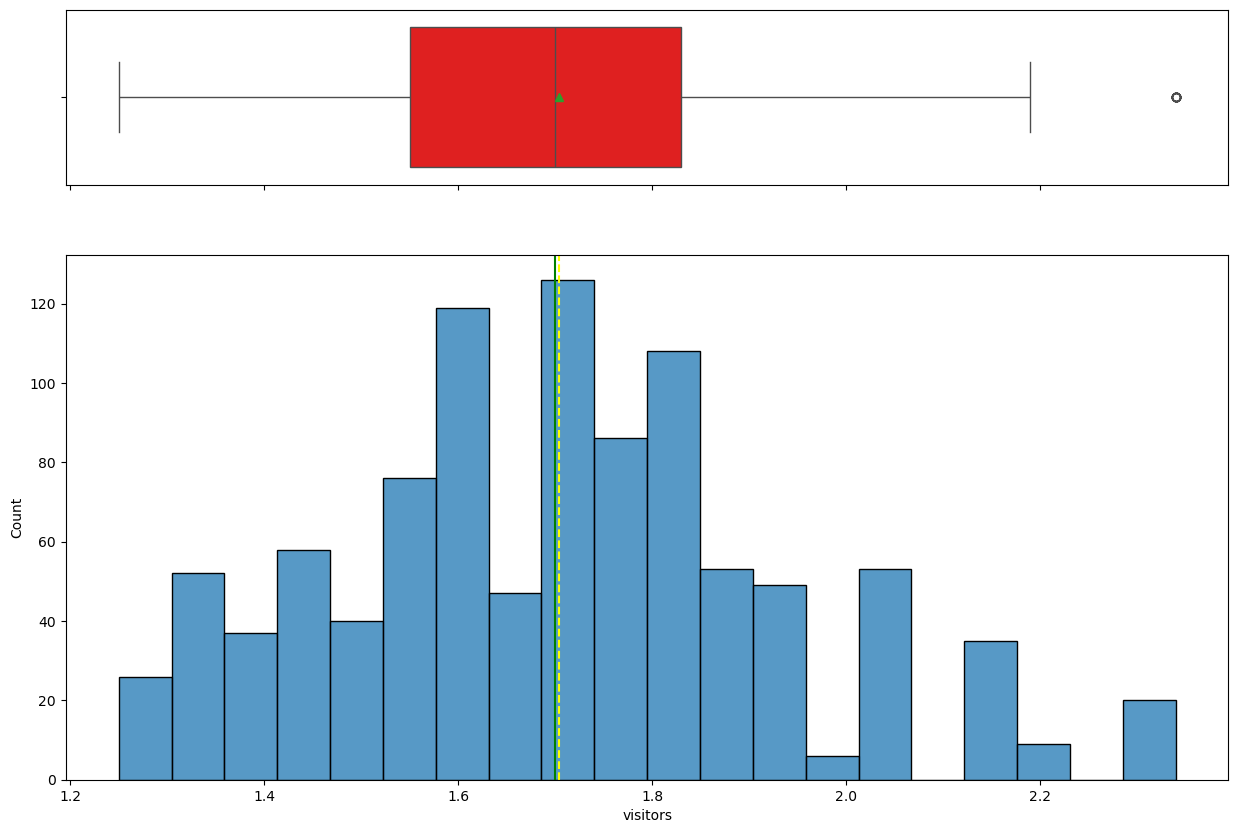

In [2264]:
histogram_boxplot(df,'visitors')
plt.savefig('Downloads/3.jpg')

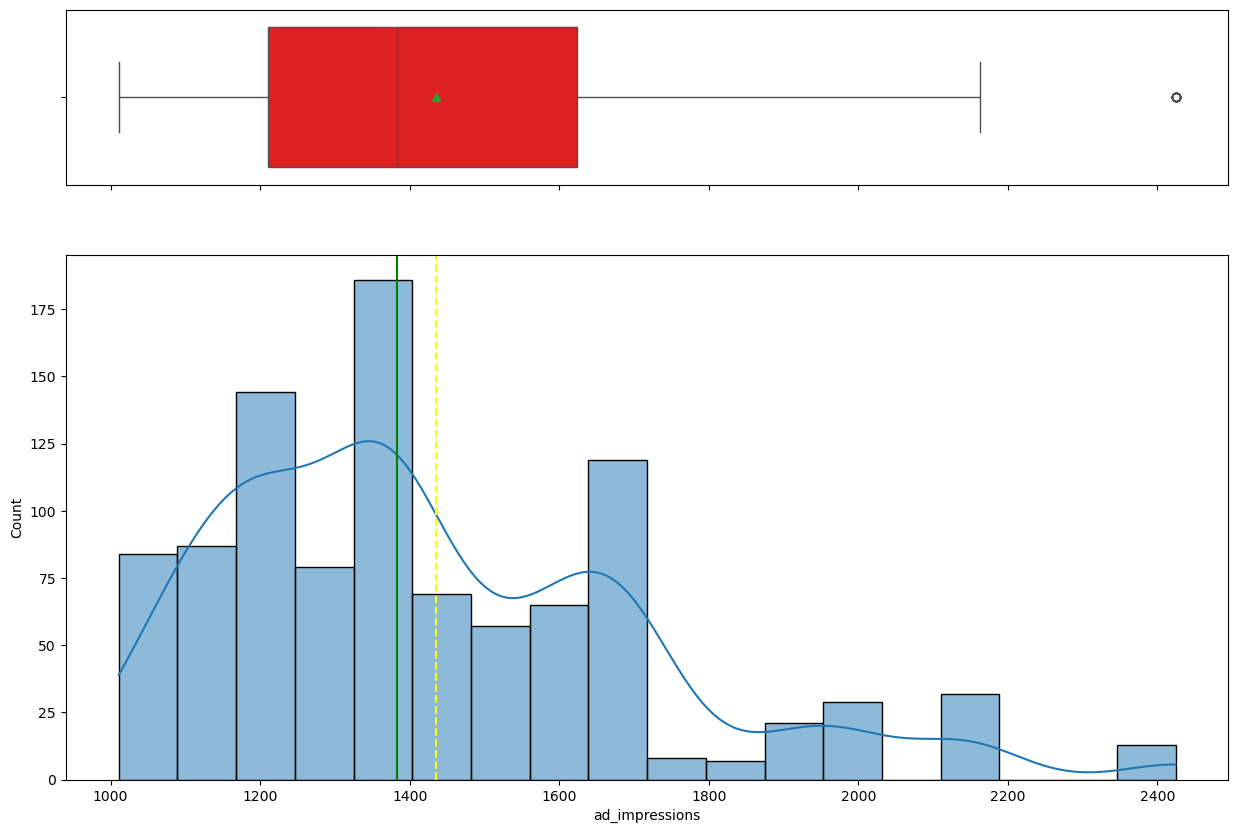

In [2265]:
histogram_boxplot(df,'ad_impressions',kde=True)
plt.savefig('Downloads/21.jpg')

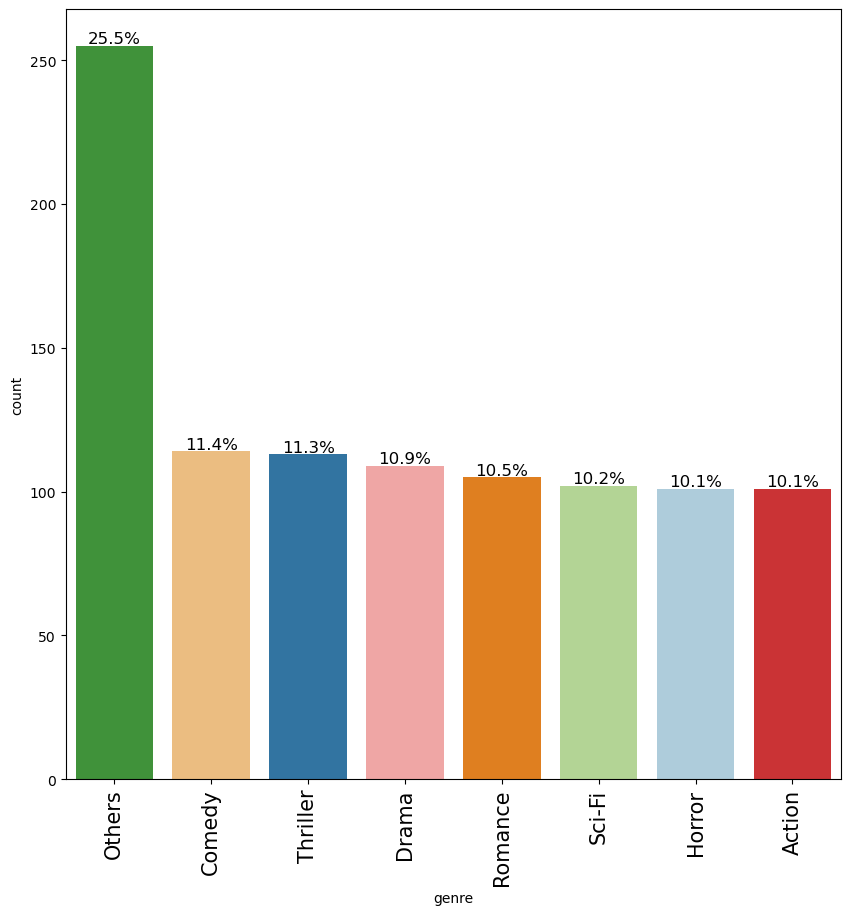

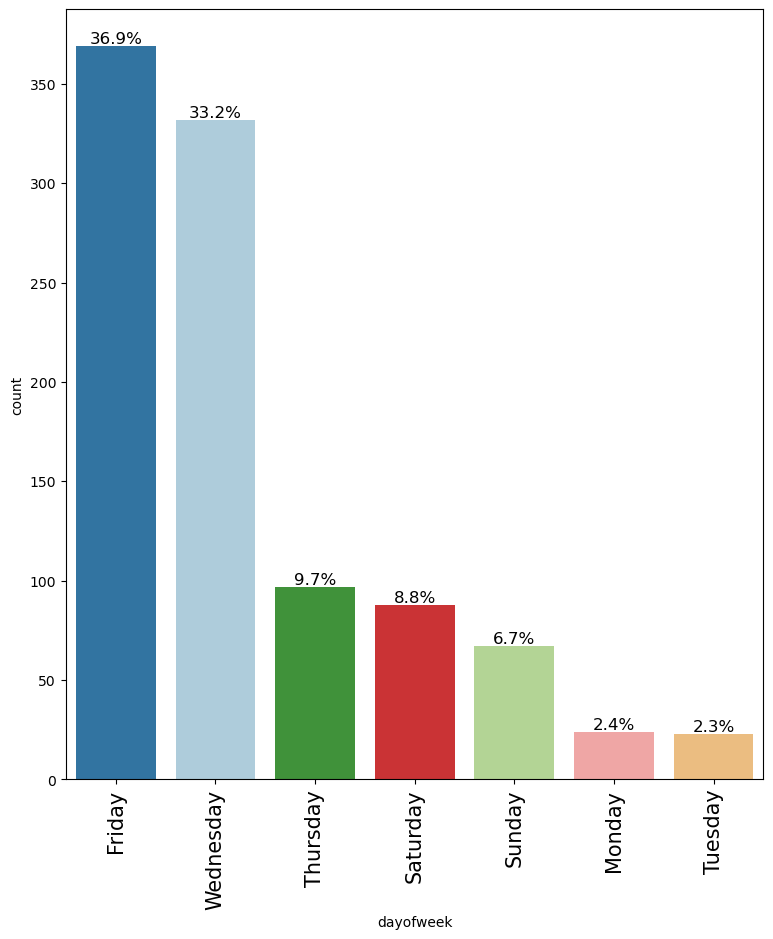

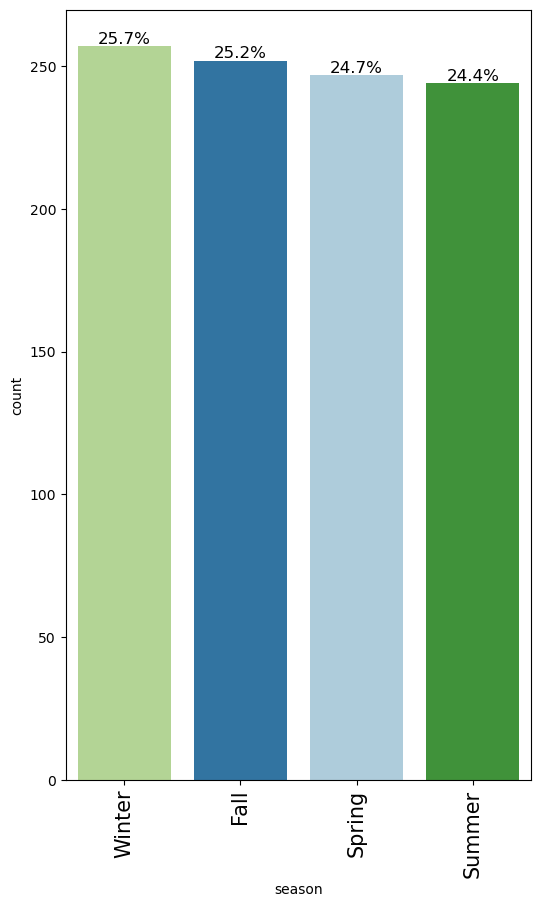

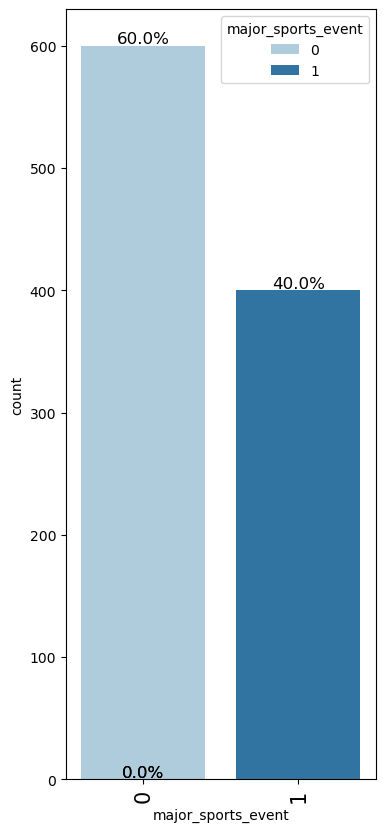

In [2266]:

labeled_barplot(df,'genre',perc=True)
plt.savefig('Downloads/4.jpg')
labeled_barplot(df,'dayofweek',perc=True)
plt.savefig('Downloads/5.jpg')
labeled_barplot(df,'season',perc=True)
plt.savefig('Downloads/6.jpg')
labeled_barplot(df,'major_sports_event',perc=True)
plt.savefig('Downloads/7.jpg')



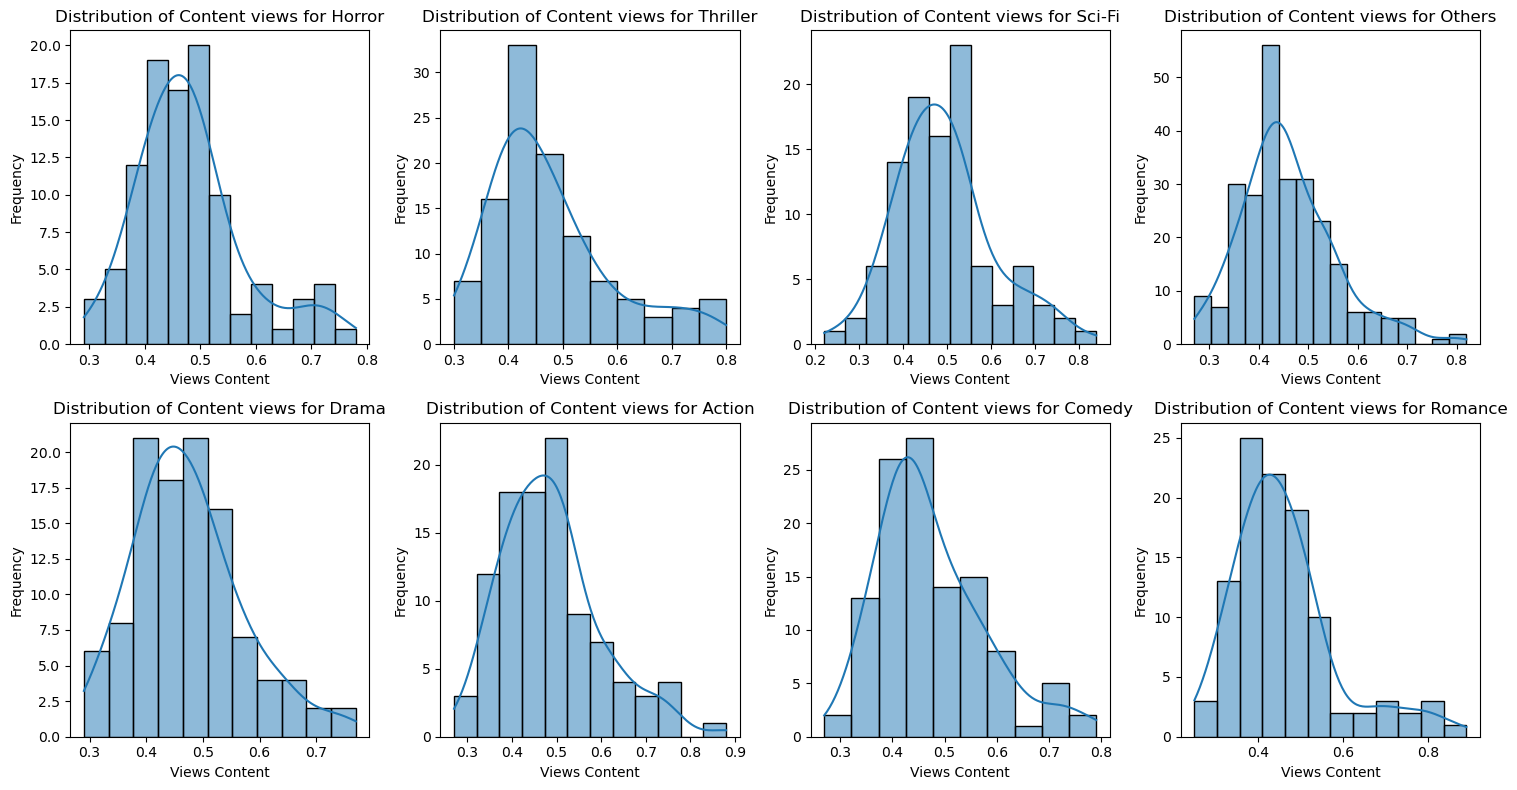

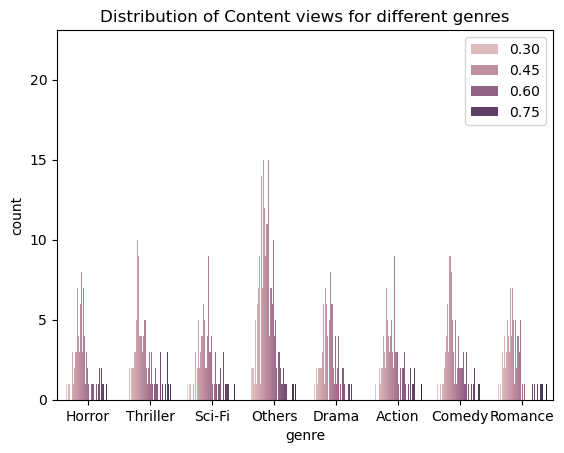

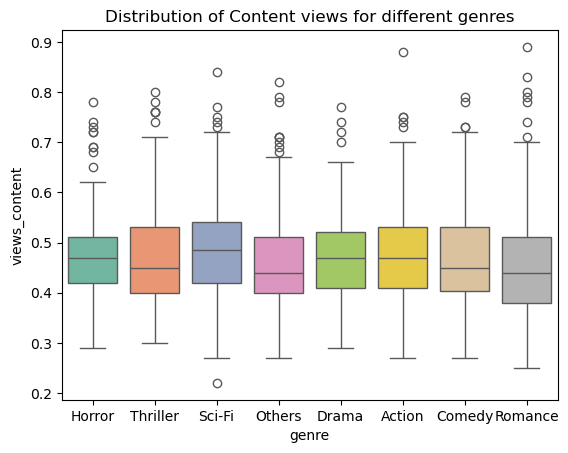

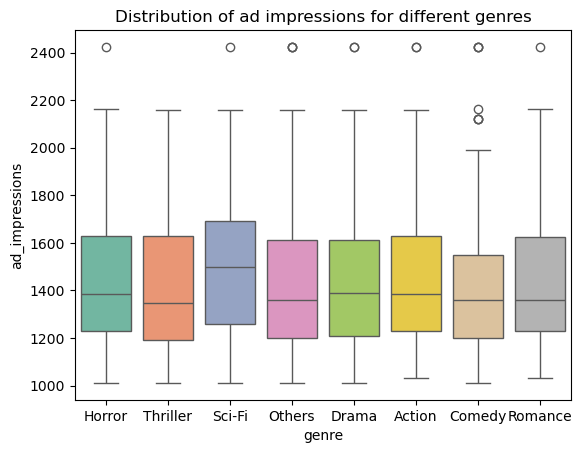

In [2267]:
# Creating a 2x4 grid of subplots to visualize the distribution of views by genre
plt.figure(figsize=(15, 8))

for i, genre in enumerate(df['genre'].unique()):
    plt.subplot(2, 4, i + 1)
    sns.histplot(data=df[df['genre'] == genre], x='views_content', kde=True)
    plt.title(f"Distribution of Content views for {genre}")
    plt.xlabel("Views Content")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.savefig('Downloads/8.jpg')
plt.show()

sns.countplot(data=df,x='genre',hue='views_content');
plt.title(f"Distribution of Content views for different genres")
plt.legend(loc='upper right');
plt.savefig('Downloads/9.jpg')
plt.show()
sns.boxplot(data=df,y='views_content',x='genre', palette='Set2');
plt.title(f"Distribution of Content views for different genres")
plt.savefig('Downloads/10.jpg')
plt.show()
sns.boxplot(data=df,y='ad_impressions',x='genre', palette='Set2');
plt.title(f"Distribution of ad impressions for different genres")
plt.savefig('Downloads/30.jpg')
plt.show()

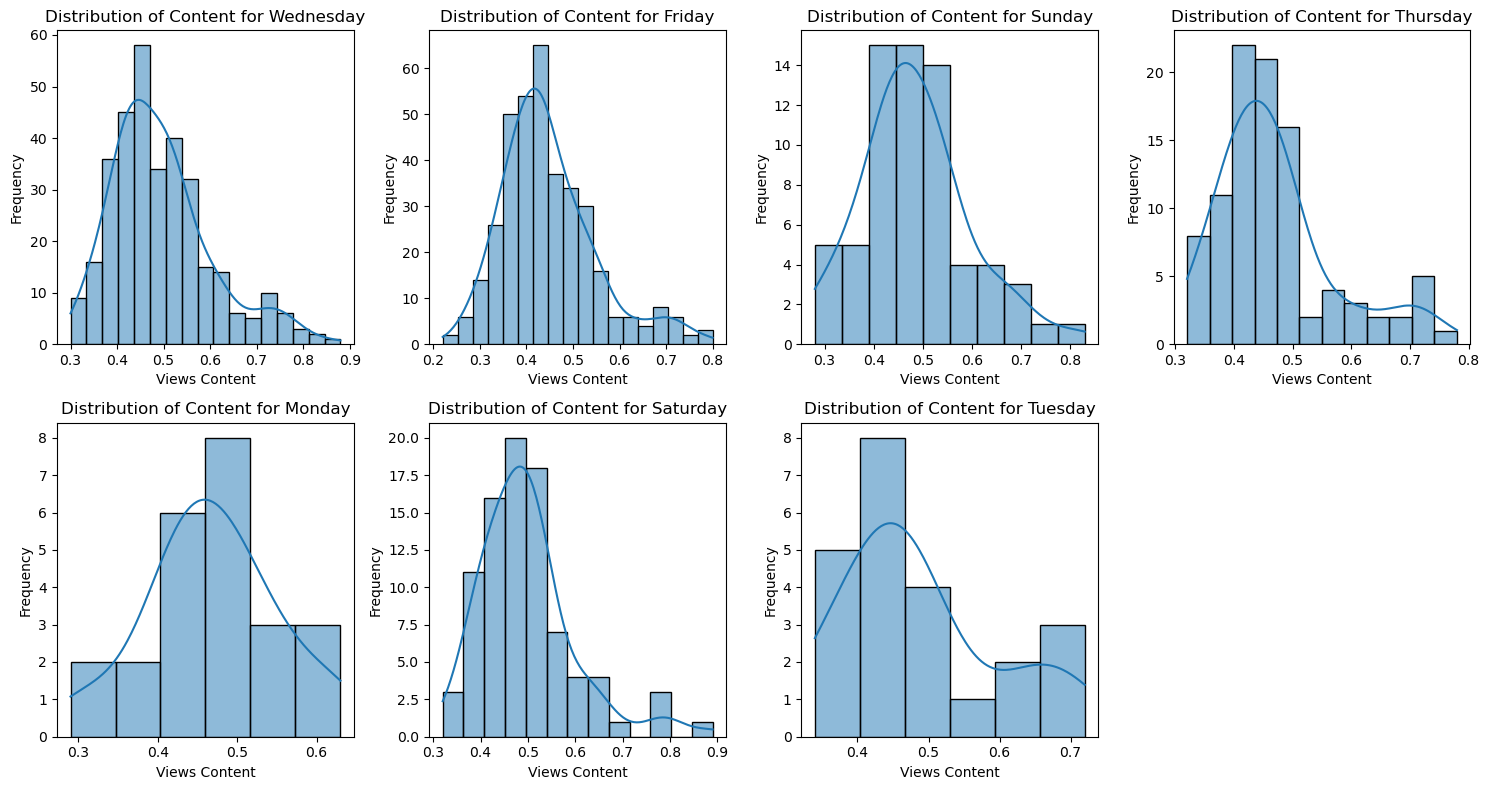

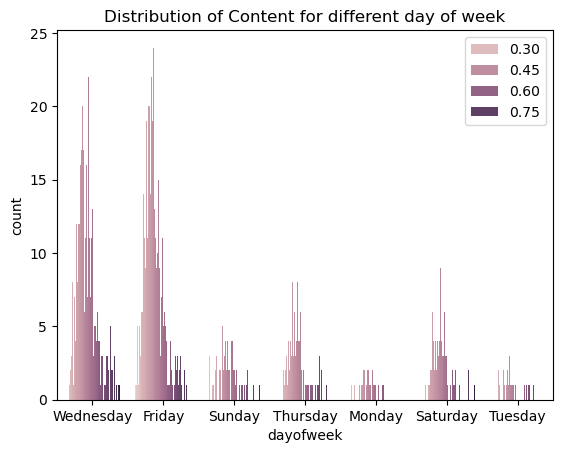

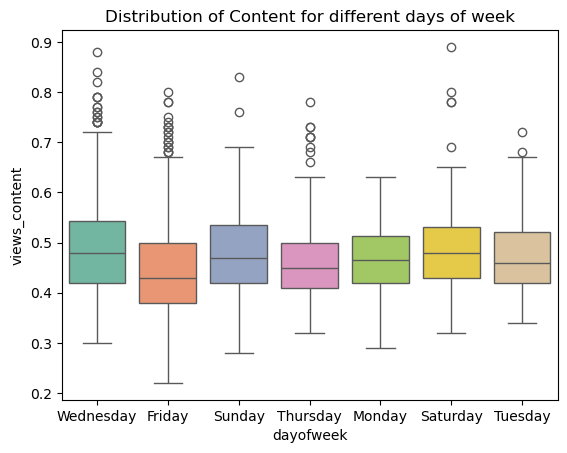

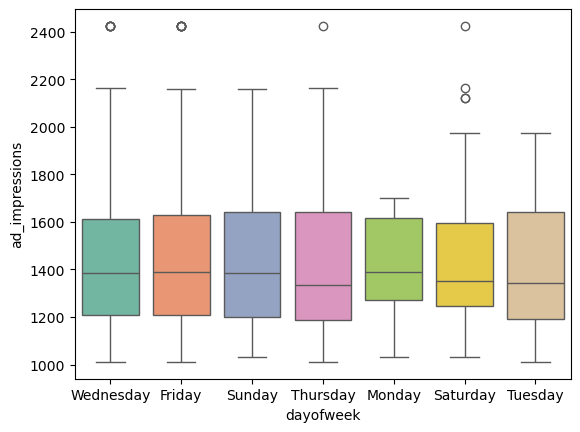

In [2268]:
plt.figure(figsize=(15, 8))
for i, dayofweek in enumerate(df['dayofweek'].unique()):
    plt.subplot(2, 4, i + 1)
    sns.histplot(data=df[df['dayofweek'] == dayofweek], x='views_content', kde=True)
    plt.title(f"Distribution of Content for {dayofweek}")
    plt.xlabel("Views Content")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.savefig('Downloads/20.jpg')
plt.show()
sns.countplot(data=df,x='dayofweek',hue='views_content');
plt.title(f"Distribution of Content for different day of week")
plt.legend(loc='upper right');

plt.savefig('Downloads/15.jpg')
plt.show()
sns.boxplot(data=df,y='views_content',x='dayofweek', palette='Set2');
plt.title(f"Distribution of Content for different days of week");

plt.savefig('Downloads/16.jpg')
plt.show()

sns.boxplot(data=df,x='dayofweek', y='ad_impressions', palette='Set2')
plt.savefig('Downloads/25.jpg')


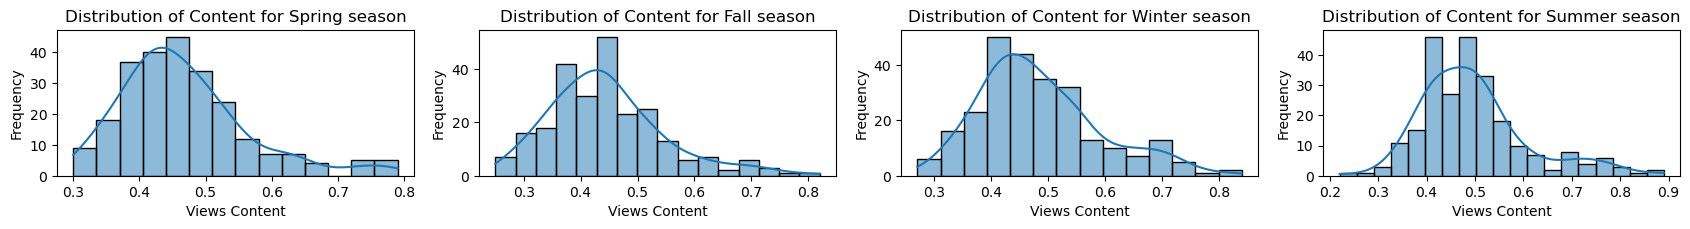

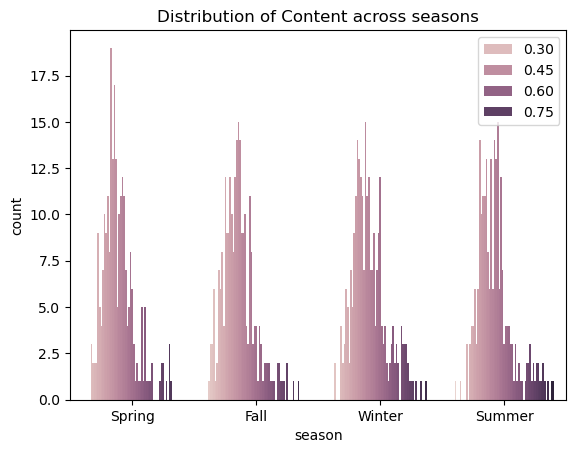

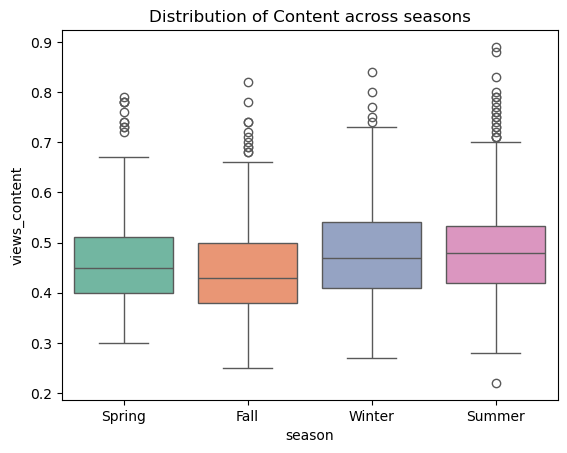

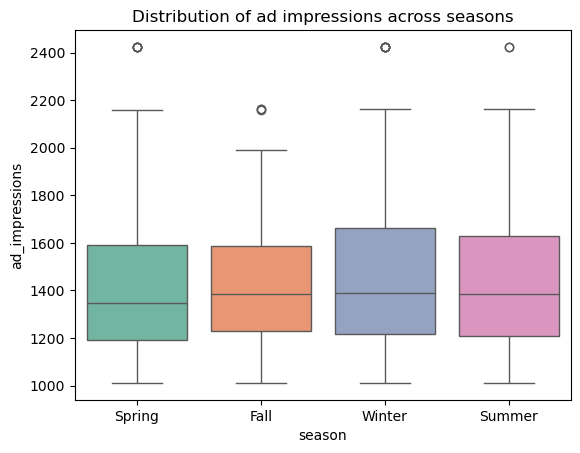

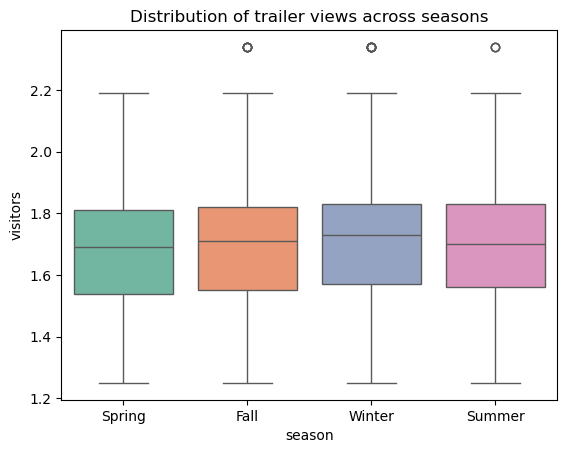

In [2269]:
# Creating a 2x4 grid of subplots to visualize the distribution of views by genre
plt.figure(figsize=(17, 4))

for i, season in enumerate(df['season'].unique()):
    plt.subplot(2, 4, i + 1)
    sns.histplot(data=df[df['season'] == season], x='views_content', kde=True)
    plt.title(f"Distribution of Content for {season} season")
    plt.xlabel("Views Content")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.savefig('Downloads/17.jpg')
plt.show()
sns.countplot(data=df,x='season',hue='views_content');
plt.title(f"Distribution of Content across seasons")
plt.legend(loc='upper right');
plt.savefig('Downloads/18.jpg')
plt.show()


sns.boxplot(data=df,y='views_content',x='season', palette='Set2');
plt.title(f"Distribution of Content across seasons")
plt.savefig('Downloads/19.jpg')
plt.show()

sns.boxplot(data=df,y='ad_impressions',x='season', palette='Set2');
plt.title(f"Distribution of ad impressions across seasons")
plt.savefig('Downloads/26.jpg')
plt.show()

sns.boxplot(data=df,y='visitors',x='season', palette='Set2');
plt.title(f"Distribution of trailer views across seasons")

plt.savefig('Downloads/27.jpg')

In [2270]:
plt.figure(figsize=(10,5))
num_cols = df.select_dtypes(include='number').columns.tolist()


<Figure size 1000x500 with 0 Axes>

In [2271]:
all = ['min','mean','max']
(df
 .pivot_table(index='dayofweek',
              aggfunc={'visitors':all,
                       'ad_impressions':all,
                       'views_content':all,
                       'views_trailer':all})).style.highlight_max(color="yellow",axis=0)

In [2272]:
(df
 .pivot_table(index='genre',
              aggfunc={'visitors':all,
                       'views_content':all,
                       'ad_impressions':all,
                       'views_trailer':all})
 ).style.highlight_max(color="yellow")

### 2.2 **Bivariate Analysis**

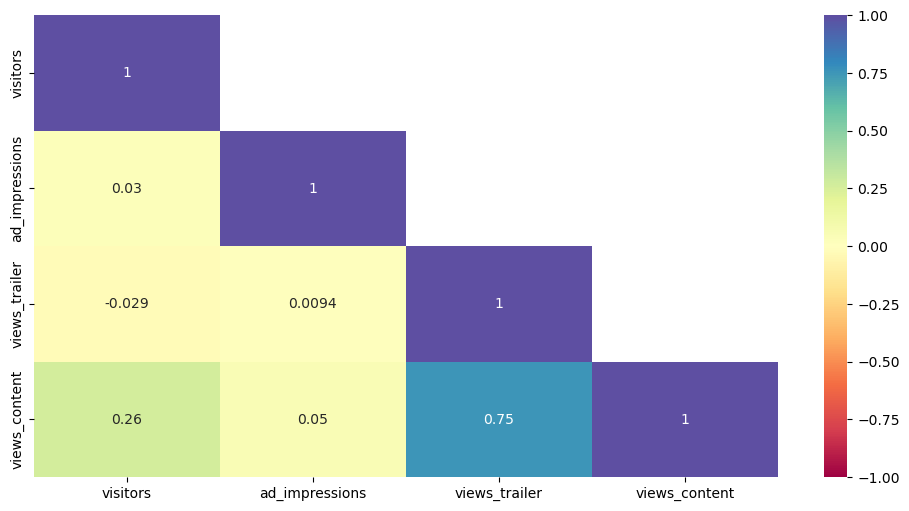

In [2274]:
cor = df[num_cols].corr()
plt.figure(figsize=(12,6))
sns.heatmap(data=cor,vmin=-1,vmax=+1, cmap="Spectral",annot=True, mask = np.triu(cor, +1))
plt.savefig('Downloads/11.jpg')

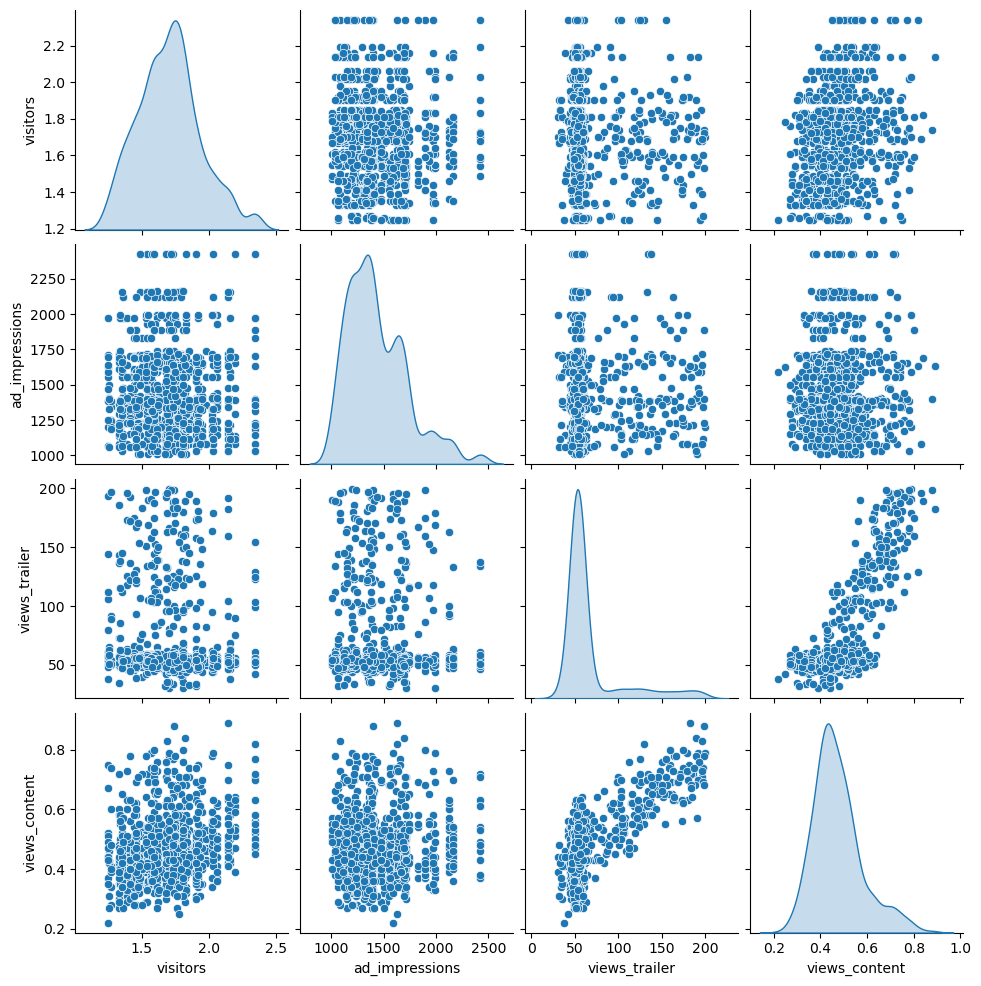

In [2275]:
sns.pairplot(df.drop('major_sports_event',axis=1),diag_kind="kde")
# plt.xticks(rotation=90);
plt.savefig('Downloads/12.jpg')

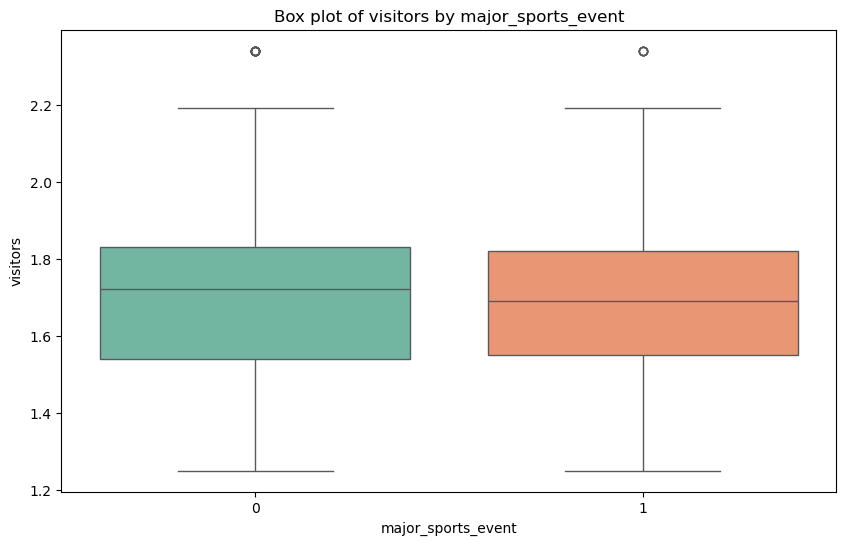

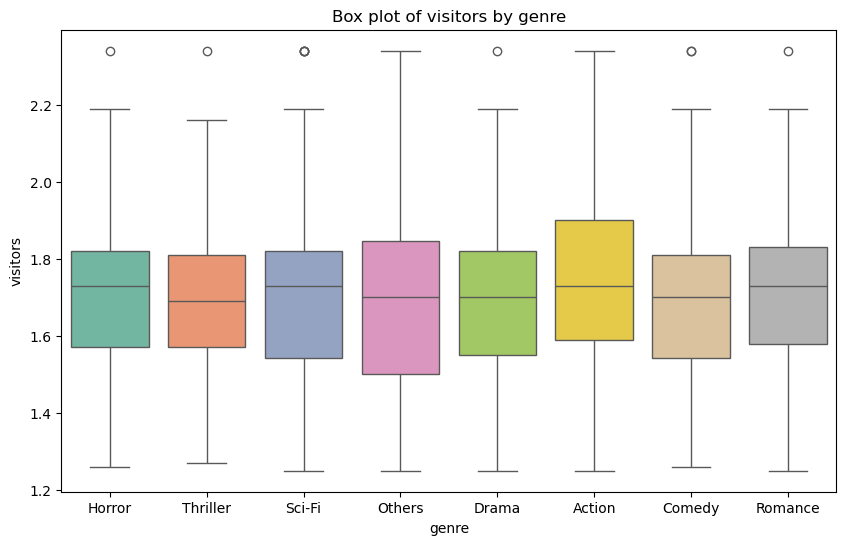

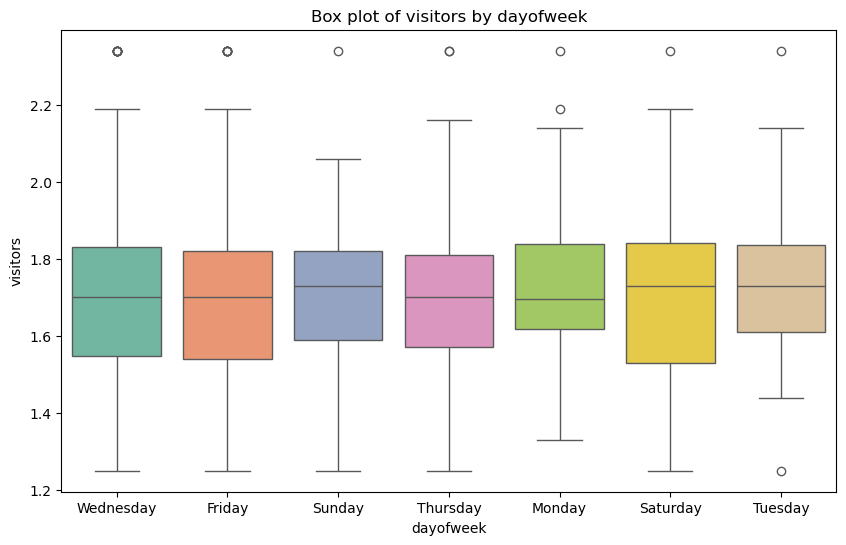

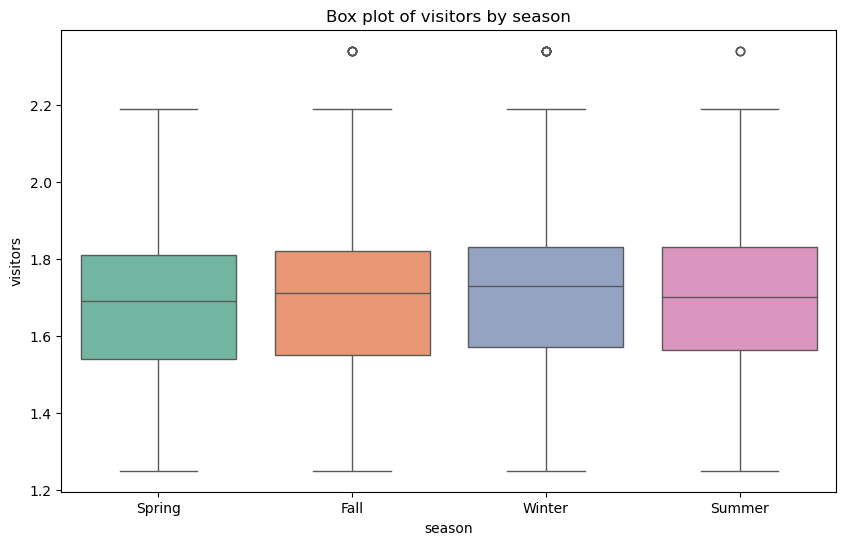

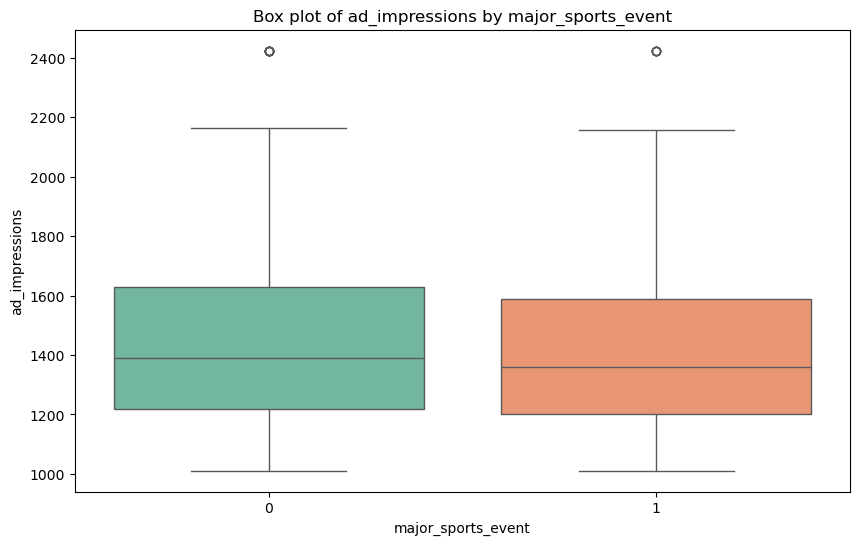

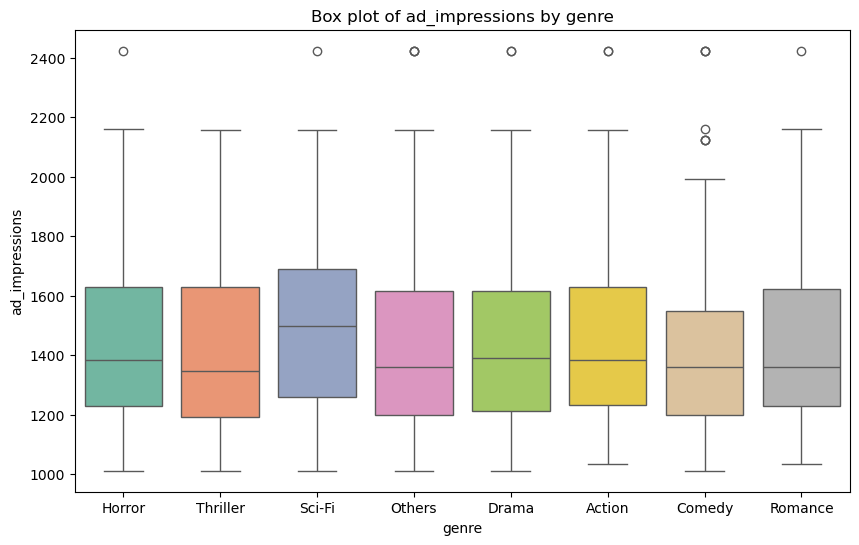

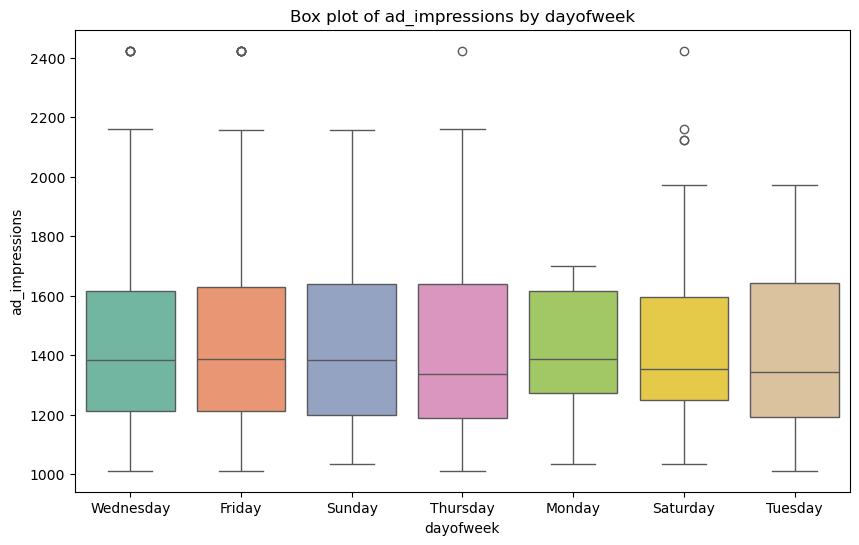

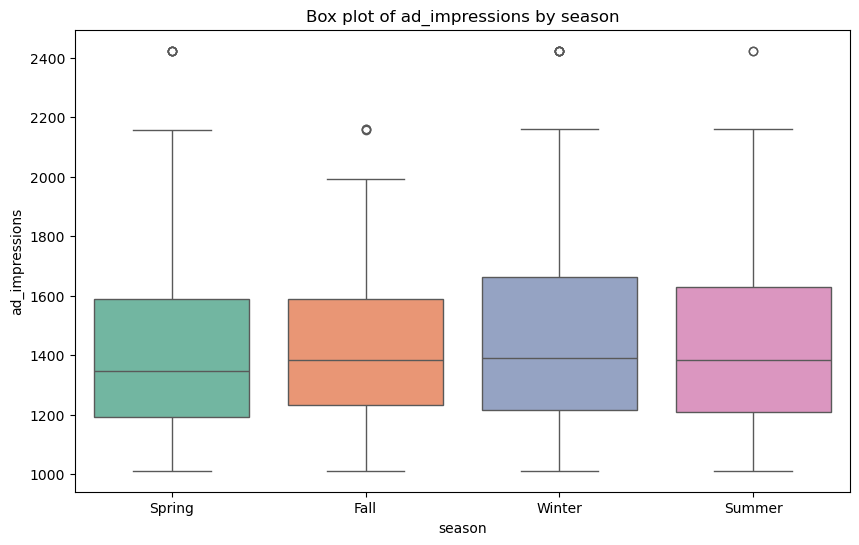

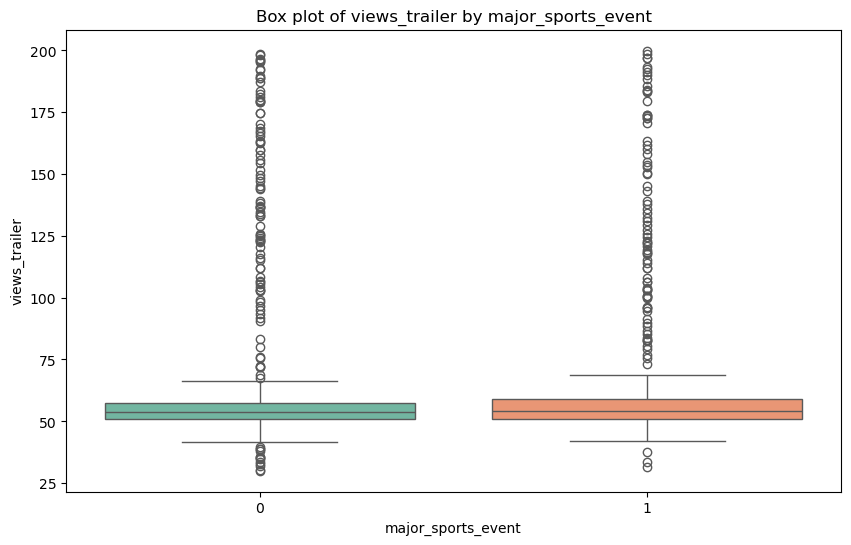

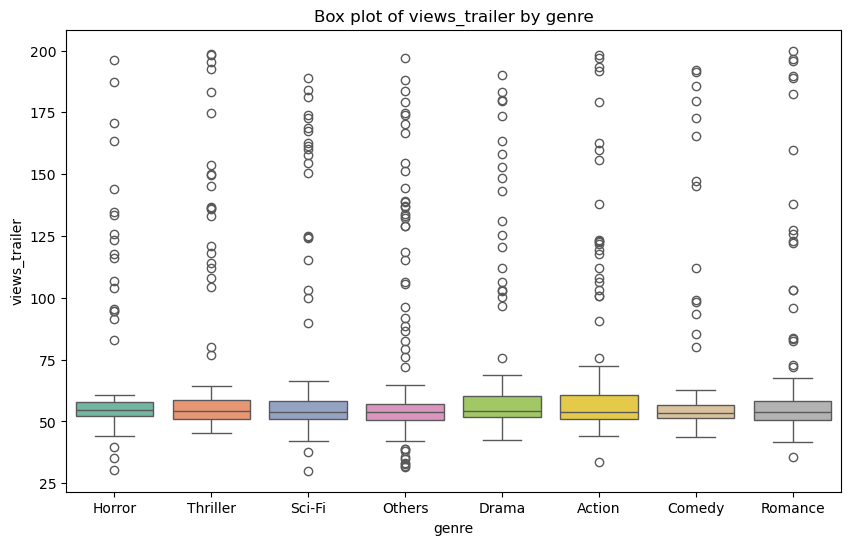

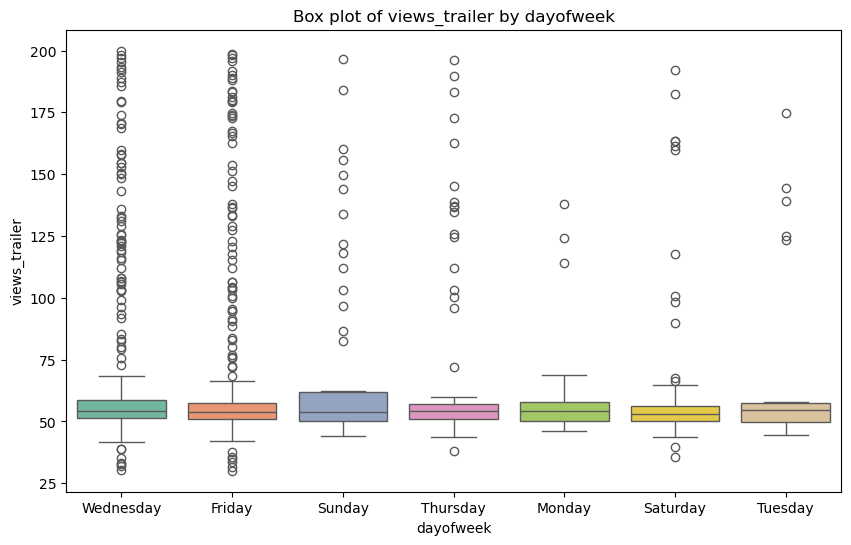

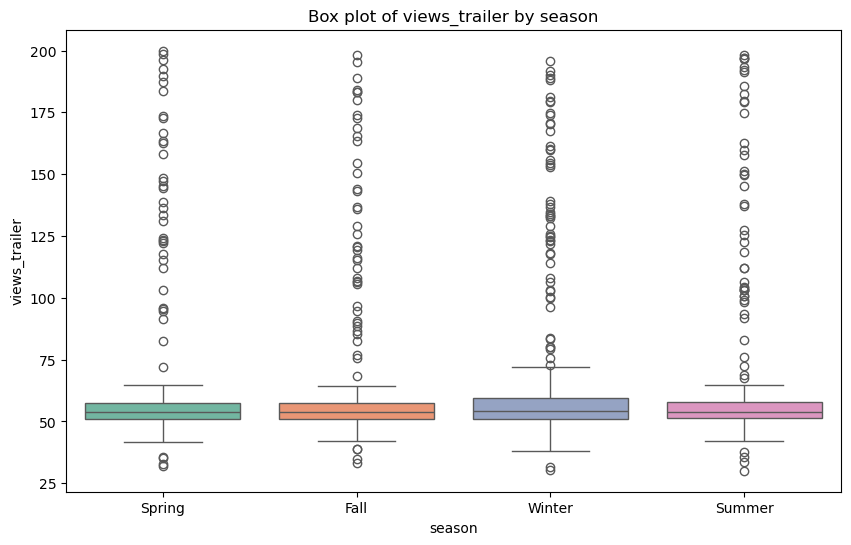

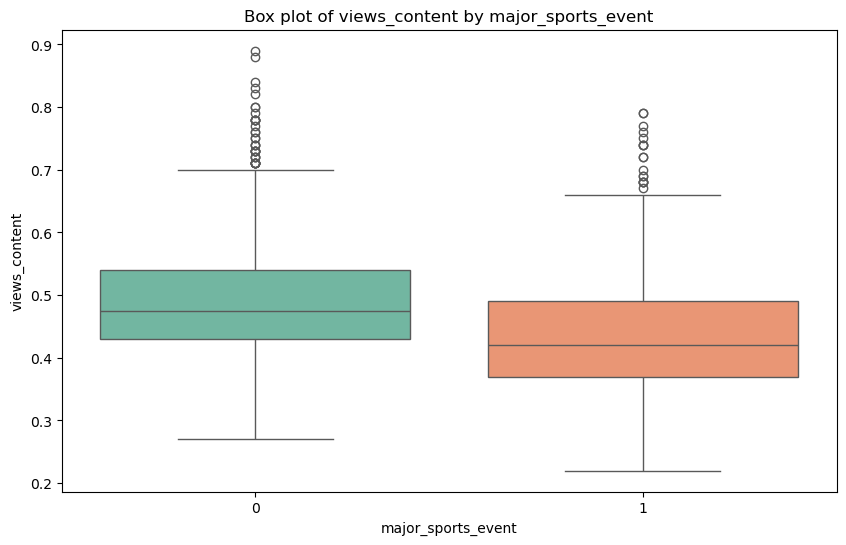

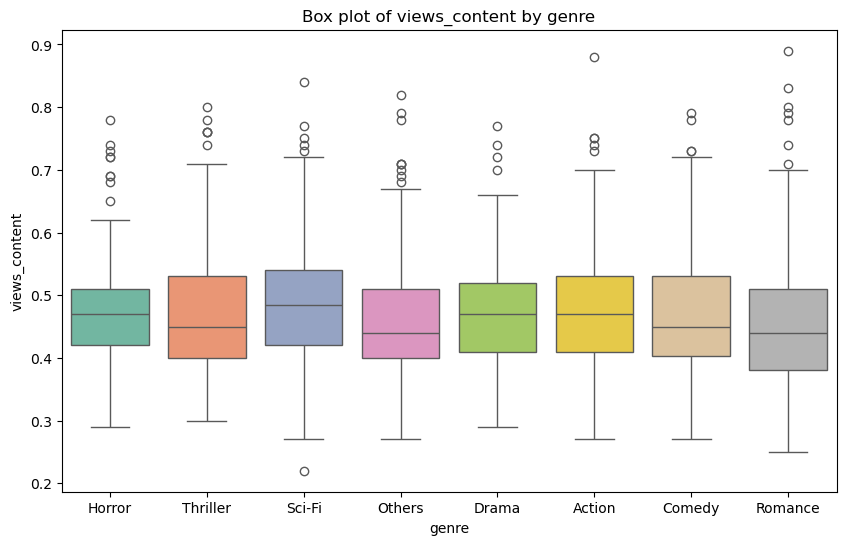

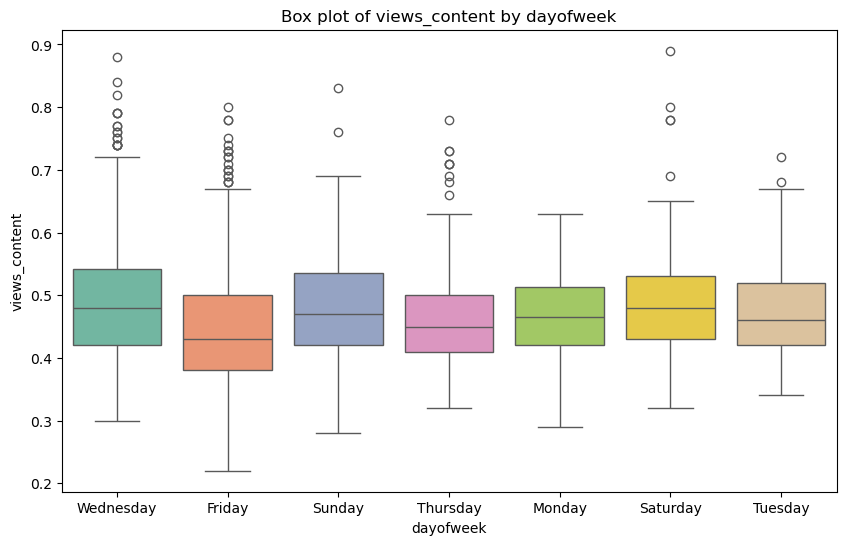

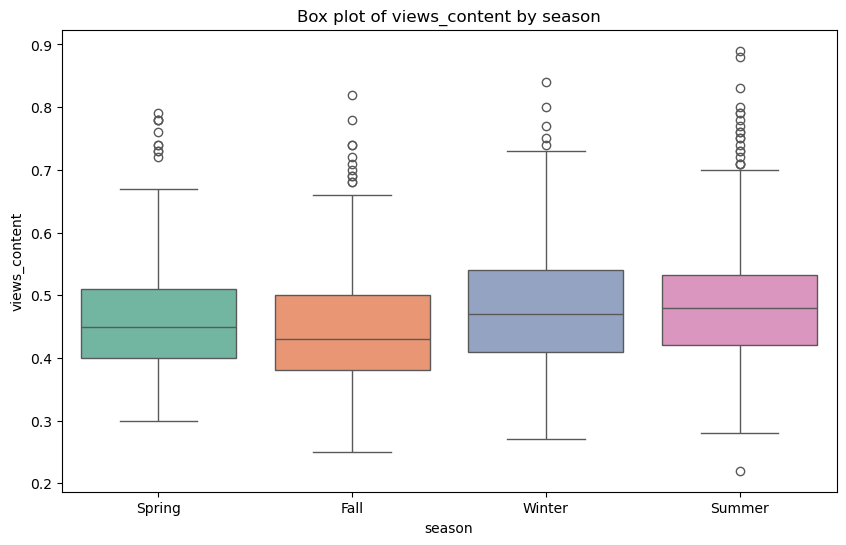

In [2276]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()  # Numeric columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()  # Categorical columns
# Loop through each numerical and categorical combination
for num_col in num_cols:
    for cat_col in cat_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x=cat_col, y=num_col, palette='Set2')
        plt.title(f'Box plot of {num_col} by {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.show()

# Data preprocessing

## Duplicate value check and Missing value treatment

In [2279]:
print(cat_cols,num_cols)

['major_sports_event', 'genre', 'dayofweek', 'season'] ['visitors', 'ad_impressions', 'views_trailer', 'views_content']


In [2280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   object 
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), object(4)
memory usage: 62.6+ KB


In [2281]:
df.duplicated().sum()

0

In [2282]:
df.isnull().sum()

visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64

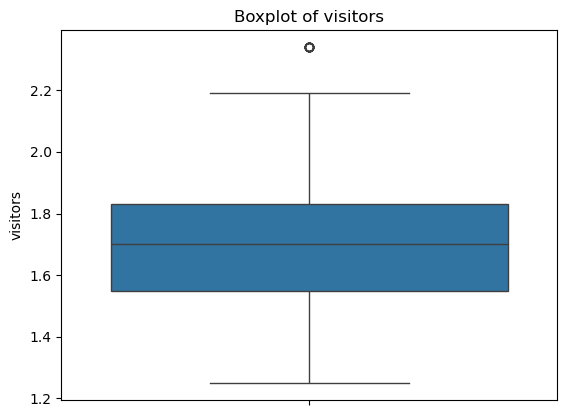

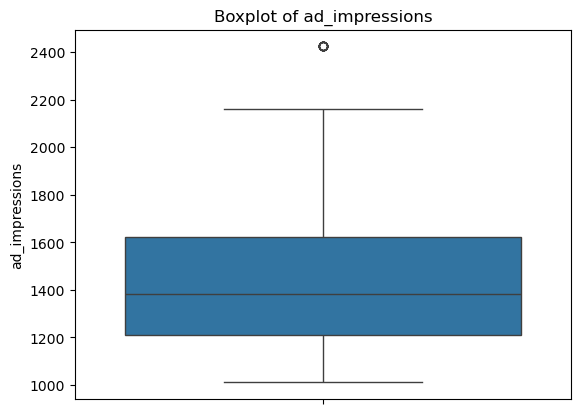

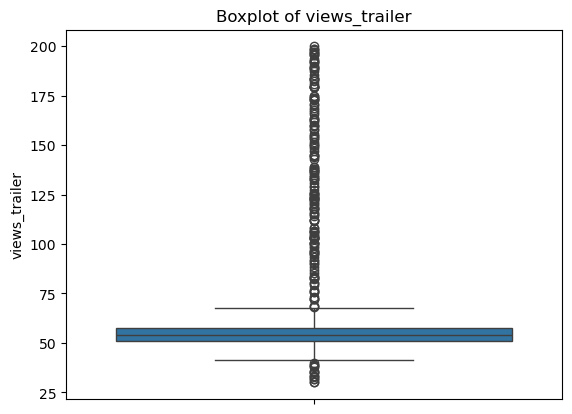

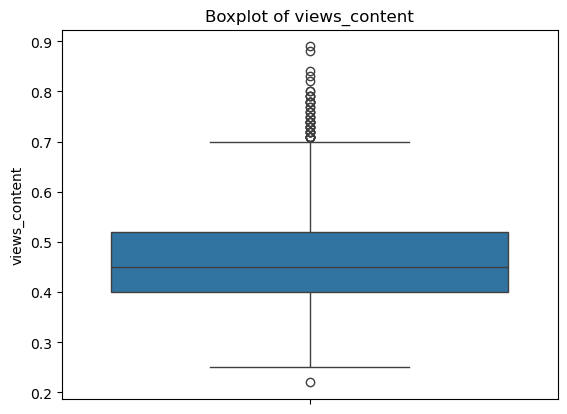

In [2283]:
for a in num_cols:
    sns.boxplot(data=df,y=a);
    plt.title(f'Boxplot of {a}')
    plt.show()

In [2284]:
df[df['visitors']>2.2]['visitors'].unique()

array([2.34])

In [2285]:
df[df['ad_impressions']>2400]['ad_impressions'].unique()

array([2424.2])

## Outlier treatment

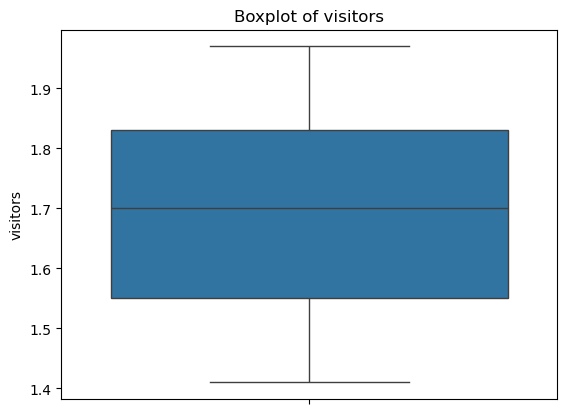

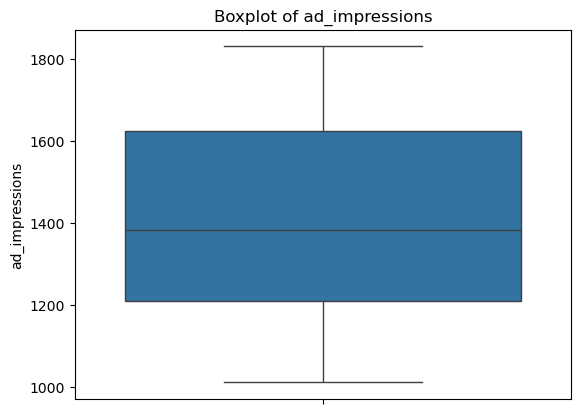

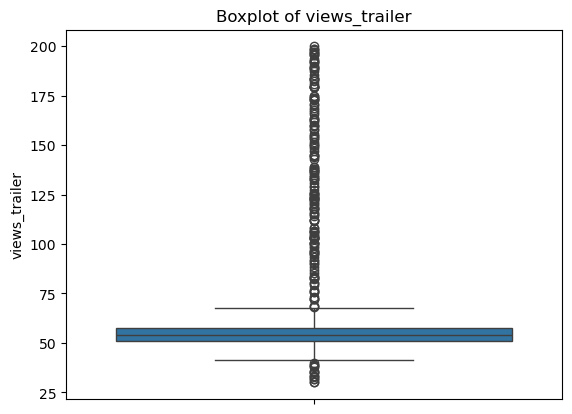

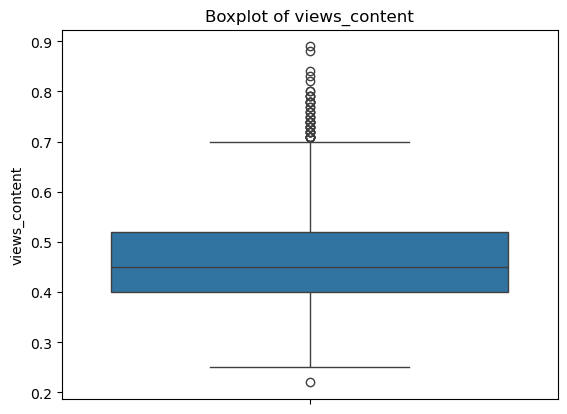

In [2287]:
def treat_ouliers(df,col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR =Q1-Q3
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)
    return df
# treat_ouliers(df,'views_content')
treat_ouliers(df,'visitors')
treat_ouliers(df,'ad_impressions')
# treat_ouliers(df,'views_trailer')
for a in num_cols:
    sns.boxplot(data=df,y=a);
    plt.title(f'Boxplot of {a}')
    plt.show()

## Feature engineering and Data preparation for modeling

In [2289]:
df['major_sports_event'] = df['major_sports_event'].replace({0:'no',1:'yes'})
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

cdata = pd.get_dummies(df, columns=df.select_dtypes(include=["object", "category"]).columns.tolist(),drop_first=True)

# Assuming `df` is your DataFrame and `views_content` is the target variable
y = cdata['views_content']
x = cdata.drop('views_content', axis=1)

# Add constant to predictor variables
x = sm.add_constant(x)


x=x.astype(float)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=1)

print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])



Number of rows in train data = 650
Number of rows in test data = 350


In [2290]:
x.head()

,const,visitors,ad_impressions,views_trailer,major_sports_event_yes,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.0,1.67,1113.81,56.70,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,1.46,1498.41,52.69,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.47,1079.19,48.74,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.85,1342.77,49.81,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.46,1498.41,55.83,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [2443]:
model = sm.OLS(y_train,x_train).fit()
print(model.summary())
print(model.params)

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     108.3
Date:                Sun, 17 Nov 2024   Prob (F-statistic):          1.85e-188
Time:                        16:46:18   Log-Likelihood:                 1024.2
No. Observations:                 650   AIC:                            -2006.
Df Residuals:                     629   BIC:                            -1912.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [2292]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

def adj_r2_score(predictors,targets,predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))
# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [2293]:
print('checking model performance on train set.')
model_train = model_performance_regression(model,x_train,y_train)
model_train

checking model performance on train set.


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.050051,0.039293,0.774969,0.767445,8.830589


In [2294]:
print('checking model performance on test set.')
model_test = model_performance_regression(model,x_test,y_test)
model_test

checking model performance on test set.


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.051085,0.040841,0.769931,0.755201,8.914241


In [2445]:
model.params

const                     2.575595e-02
visitors                  1.547980e-01
ad_impressions           -8.751801e-07
views_trailer             2.337062e-03
major_sports_event_yes   -6.131777e-02
genre_Comedy              1.142820e-02
genre_Drama               1.164571e-02
genre_Horror              7.411579e-03
genre_Others              5.552040e-03
genre_Romance            -1.953020e-03
genre_Sci-Fi              1.009909e-02
genre_Thriller            4.751552e-03
dayofweek_Monday          3.059293e-02
dayofweek_Saturday        5.797100e-02
dayofweek_Sunday          3.446085e-02
dayofweek_Thursday        1.692324e-02
dayofweek_Tuesday         2.497617e-02
dayofweek_Wednesday       4.560173e-02
season_Spring             2.336882e-02
season_Summer             4.430826e-02
season_Winter             2.906502e-02
dtype: float64

In [2437]:
model2.params

const                     0.033458
visitors                  0.153685
views_trailer             0.002335
major_sports_event_yes   -0.061631
dayofweek_Monday          0.030482
dayofweek_Saturday        0.057147
dayofweek_Sunday          0.032381
dayofweek_Thursday        0.015433
dayofweek_Wednesday       0.045175
season_Spring             0.023864
season_Summer             0.043911
season_Winter             0.030353
dtype: float64

In [2439]:
model3.params

const                    -0.133001
visitors                  0.153296
views_trailer             0.000499
major_sports_event_yes   -0.062877
dayofweek_Monday          0.028663
dayofweek_Saturday        0.057185
dayofweek_Sunday          0.032584
dayofweek_Thursday        0.014742
dayofweek_Wednesday       0.044807
season_Spring             0.024757
season_Summer             0.044415
season_Winter             0.030148
views_trailer_sq          0.036332
dtype: float64

In [2447]:
def print_equation(y, x_train, model):
    print(f"{y} = ", end="")

    # Loop through the model parameters and corresponding x_train columns
    for i in range(len(x_train.columns)):
        if i == 0:  # Intercept term
            print(model.params[i], "+", end=" ")
        elif i != len(x_train.columns) - 1:  # Intermediate terms
            print(
                f"({model.params[i]})*({x_train.columns[i]}) +", end=" "
            )
        else:  # Last term
            print(f"({model.params[i]})*({x_train.columns[i]})", end="")

    print()  # End the line


In [2449]:
print_equation('View_counts',x_train,model)

View_counts = 0.025755954218990795 + (0.15479798531328332)*(visitors) + (-8.751800999103212e-07)*(ad_impressions) + (0.00233706181227939)*(views_trailer) + (-0.061317774474314676)*(major_sports_event_yes) + (0.011428201612989995)*(genre_Comedy) + (0.01164571413860957)*(genre_Drama) + (0.007411579149033405)*(genre_Horror) + (0.005552040053479907)*(genre_Others) + (-0.0019530201076793374)*(genre_Romance) + (0.010099086222761115)*(genre_Sci-Fi) + (0.004751552092982891)*(genre_Thriller) + (0.03059292899060472)*(dayofweek_Monday) + (0.0579709959930875)*(dayofweek_Saturday) + (0.03446085468072264)*(dayofweek_Sunday) + (0.01692323992153946)*(dayofweek_Thursday) + (0.0249761721449454)*(dayofweek_Tuesday) + (0.04560173218269493)*(dayofweek_Wednesday) + (0.02336882057626128)*(season_Spring) + (0.04430825834540765)*(season_Summer) + (0.029065021735611256)*(season_Winter)


# Testing the assumptions of linear regression model

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

## TEST FOR MULTICOLLINEARITY

In [2302]:
# we will define a function to check VIF
# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif
    

In [2303]:
print(checking_vif(x_train))

                   feature         VIF
0                    const  145.408592
1                 visitors    1.027710
2           ad_impressions    1.039782
3            views_trailer    1.035394
4   major_sports_event_yes    1.083391
5             genre_Comedy    1.921503
6              genre_Drama    1.911886
7             genre_Horror    1.845480
8             genre_Others    2.549471
9            genre_Romance    1.761568
10            genre_Sci-Fi    1.817227
11          genre_Thriller    1.888895
12        dayofweek_Monday    1.059507
13      dayofweek_Saturday    1.151651
14        dayofweek_Sunday    1.147846
15      dayofweek_Thursday    1.185335
16       dayofweek_Tuesday    1.071421
17     dayofweek_Wednesday    1.333738
18           season_Spring    1.575481
19           season_Summer    1.592312
20           season_Winter    1.602733


## Dropping high p-value variables

We can observe that p-value for all the genre's are > 0.05. Hence I removed the entire genre column from the training dataset.

In [2306]:
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
# initial list of columns
predictors = x_train.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)


['visitors', 'views_trailer', 'major_sports_event_yes', 'dayofweek_Monday', 'dayofweek_Saturday', 'dayofweek_Sunday', 'dayofweek_Thursday', 'dayofweek_Wednesday', 'season_Spring', 'season_Summer', 'season_Winter']


In [2307]:
x_train2 = x_train[selected_features]
x_train2 = x_train2.reset_index(drop=True)
# Add constant to predictor variables
x_train2 = sm.add_constant(x_train2)
x_test2 = x_test[selected_features]
x_test2 = sm.add_constant(x_test2)
model2 = sm.OLS(y_train, x_train2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     196.6
Date:                Sun, 17 Nov 2024   Prob (F-statistic):          1.41e-196
Time:                        15:58:35   Log-Likelihood:                 1020.2
No. Observations:                 650   AIC:                            -2016.
Df Residuals:                     638   BIC:                            -1963.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [2308]:
print('checking model performance on train set.')
model_train = model_performance_regression(model2,x_train2,y_train)
model_train

checking model performance on train set.


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.050363,0.039511,0.772155,0.767863,8.873503


In [2309]:
print('checking model performance on test set.')
model_test = model_performance_regression(model2,x_test2,y_test)
model_test

checking model performance on test set.


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.051266,0.041097,0.768298,0.760047,8.997392


In [2451]:
print_equation('View_counts',x_train2,model2)

View_counts = 0.03345832276267558 + (0.15368466239808792)*(visitors) + (0.0023354539674109785)*(views_trailer) + (-0.061631103365330564)*(major_sports_event_yes) + (0.030481686264103303)*(dayofweek_Monday) + (0.05714656661505086)*(dayofweek_Saturday) + (0.032380950465093754)*(dayofweek_Sunday) + (0.015433114921408614)*(dayofweek_Thursday) + (0.0451748635632742)*(dayofweek_Wednesday) + (0.0238643166479003)*(season_Spring) + (0.043911296611955544)*(season_Summer) + (0.030353496722740486)*(season_Winter)


In [2425]:
print(checking_vif(x_train2))

                   feature        VIF
0                    const  95.414752
1                 visitors   1.013861
2            views_trailer   1.018334
3   major_sports_event_yes   1.040906
4         dayofweek_Monday   1.043717
5       dayofweek_Saturday   1.135693
6         dayofweek_Sunday   1.119728
7       dayofweek_Thursday   1.161694
8      dayofweek_Wednesday   1.285127
9            season_Spring   1.544629
10           season_Summer   1.548045
11           season_Winter   1.570438


## TEST FOR LINEARITY AND INDEPENDENCE

**Why the test?**
* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.

**How to check linearity?**

* Make a plot of fitted values vs residuals. If they don't follow any pattern (the curve is a straight line), then we say the model is linear otherwise model is showing signs of non-linearity.

**How to fix if this assumption is not followed?**

* We can try different transformations.

In [2313]:
data_for_test2 = pd.DataFrame({"Actual Values":y_train,"Fitted Values":model2.fittedvalues,"Residuals":model2.resid})


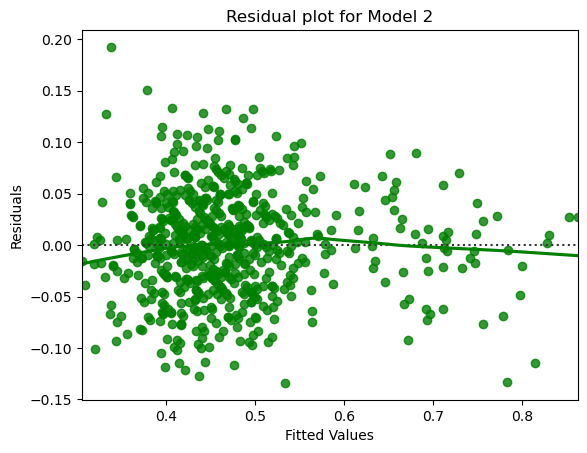

In [2314]:
sns.residplot(data_for_test2, x="Fitted Values", y="Residuals", color="green", lowess=True)
plt.title('Residual plot for Model 2')
plt.savefig('Downloads/50.jpg')

In [2315]:
# Access AIC and BIC
print("AIC:", model2.aic)
print("BIC:", model2.bic)

AIC: -2016.4192460855693
BIC: -1962.695577730893


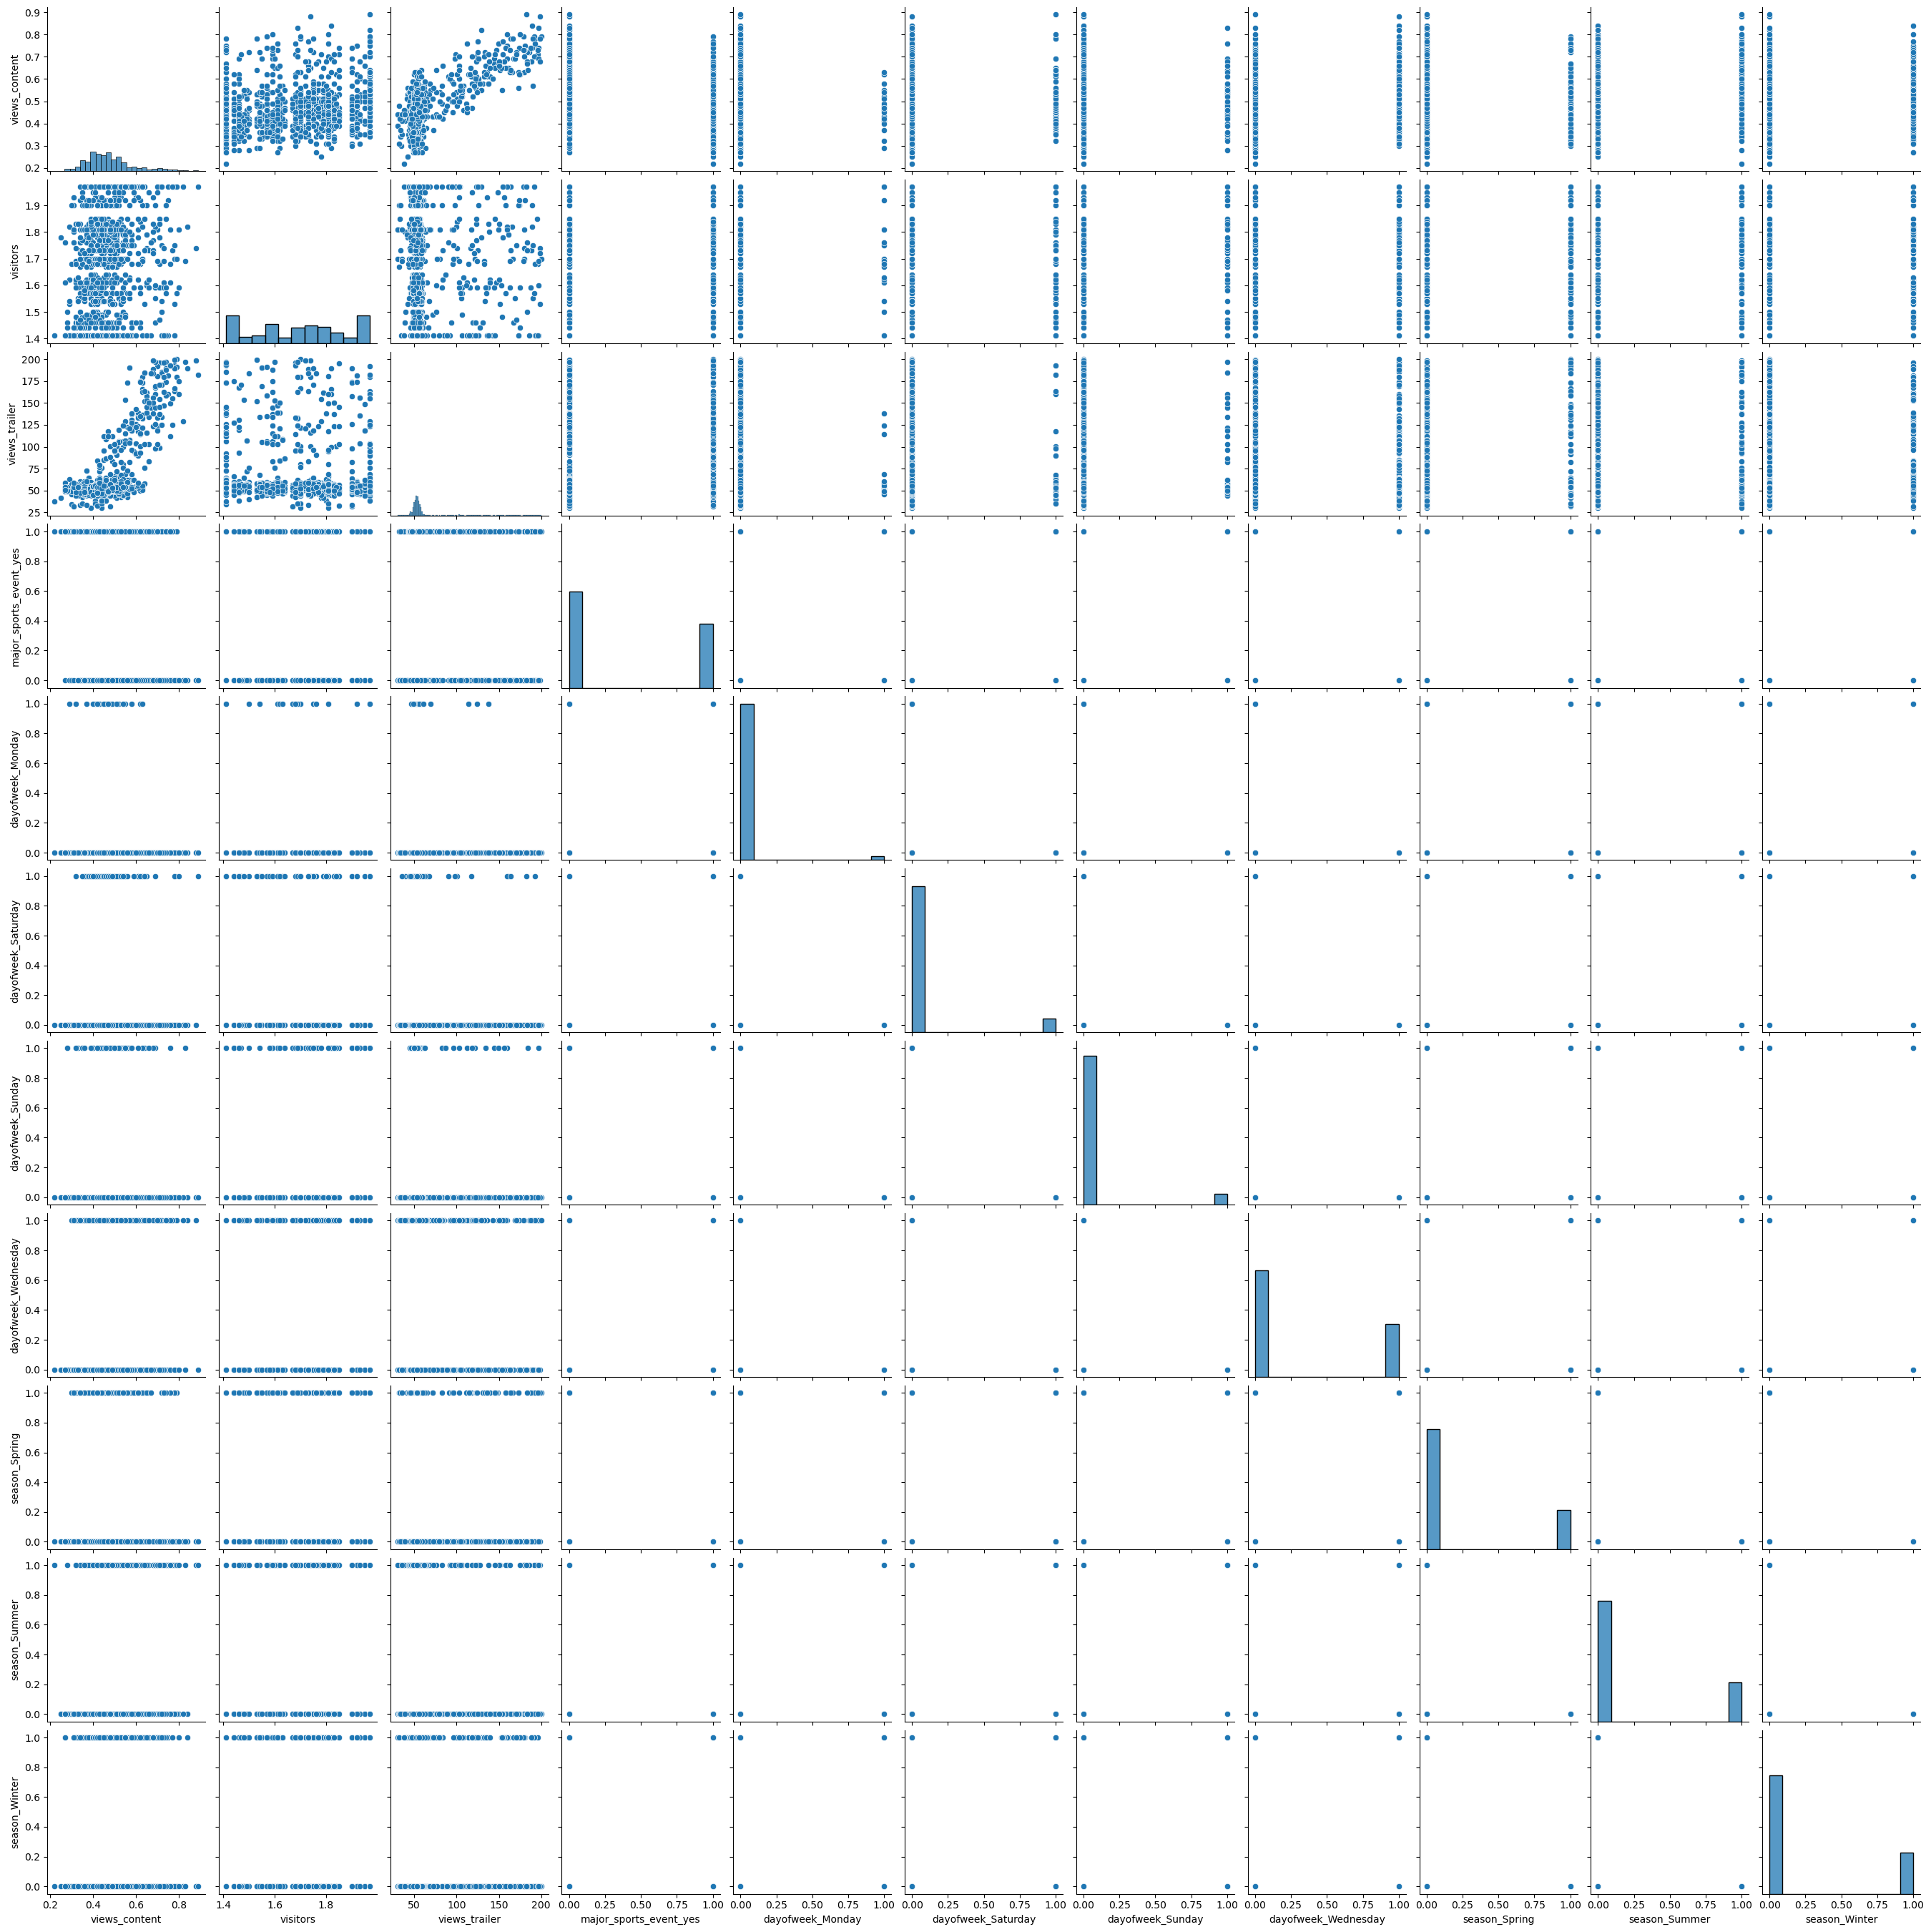

In [2316]:
sns.pairplot(data = cdata[['views_content','visitors', 'views_trailer', 'major_sports_event_yes',
       'dayofweek_Monday', 'dayofweek_Saturday', 'dayofweek_Sunday',
       'dayofweek_Wednesday', 'season_Spring', 'season_Summer',
       'season_Winter']])

## Model 3

In [2421]:
x_train3 = x_train2.copy()
x_train3['views_trailer_sq']=np.sqrt(x_train2['views_trailer'])
x_train3 = x_train3.reset_index(drop=True)


x_test3 = x_test2.copy()
x_test3['views_trailer_sq']=np.sqrt(x_test2['views_trailer'])

model3 = sm.OLS(y_train, x_train3).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     182.3
Date:                Sun, 17 Nov 2024   Prob (F-statistic):          7.33e-197
Time:                        16:37:04   Log-Likelihood:                 1023.6
No. Observations:                 650   AIC:                            -2021.
Df Residuals:                     637   BIC:                            -1963.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

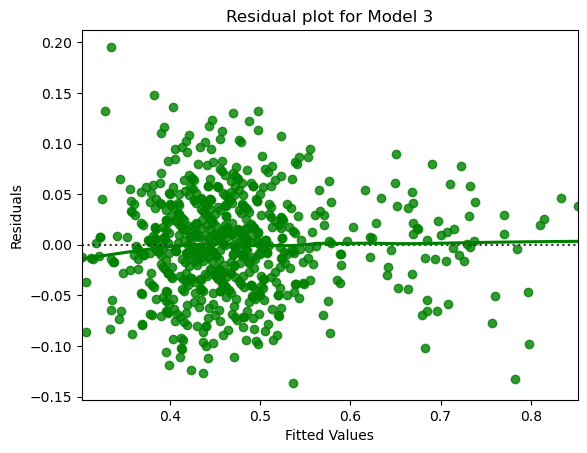

In [2423]:
data_for_test3 = pd.DataFrame({"Actual Values":y_train,"Fitted Values":model3.fittedvalues,"Residuals":model3.resid})
sns.residplot(data_for_test3, x="Fitted Values", y="Residuals", color="green", lowess=True)
plt.title('Residual plot for Model 3')
plt.savefig('Downloads/51.jpg')

In [2403]:
# Access AIC and BIC
print("AIC:", model3.aic)
print("BIC:", model3.bic)

AIC: -2021.2191872605417
BIC: -1963.0185465429759


## TEST FOR NORMALITY

**What is the test?**

* Error terms/residuals should be normally distributed.

* If the error terms are not normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares.

**What does non-normality indicate?**

* It suggests that there are a few unusual data points which must be studied closely to make a better model.

**How to check the Normality?**

* It can be checked via QQ Plot - residuals following normal distribution will make a straight line plot, otherwise not.

* Another test to check for normality is the Shapiro-Wilk test.

**How to Make residuals normal?**

* We can apply transformations like log, exponential, arcsinh, etc as per our data.

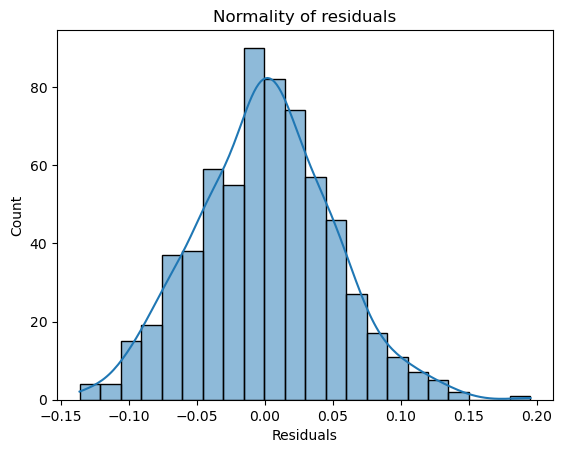

Shpiro Test
ShapiroResult(statistic=0.9970740875063351, pvalue=0.29531854004248004)


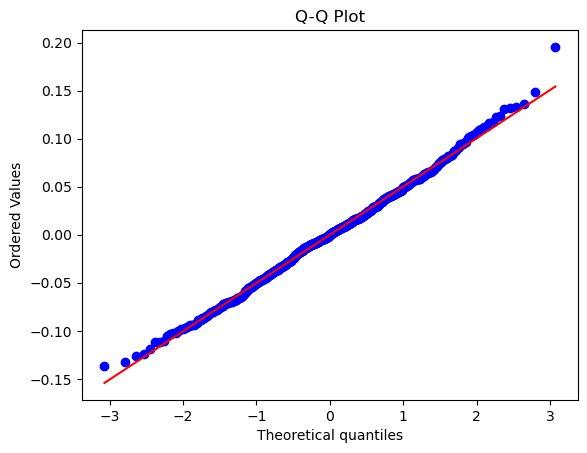

In [2322]:
sns.histplot(data=data_for_test3, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.savefig('Downloads/52.jpg')
plt.show()
print('Shpiro Test')
print(stats.shapiro(data_for_test3["Residuals"]))
import pylab
import scipy.stats as stats
stats.probplot(data_for_test3["Residuals"], dist="norm", plot=pylab)
plt.title("Q-Q Plot")
plt.savefig('Downloads/53.jpg')
plt.show()


The Shapiro-Wilk test can also be used for checking the normality. The null and alternate hypotheses of the test are as follows:

* Null hypothesis - Data is normally distributed.
* Alternate hypothesis - Data is not normally distributed.

### TEST FOR HOMOSCEDASTICITY

* **Homoscedacity** - If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

* **Heteroscedacity** - If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

**Why the test?** 

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check if model has Heteroscedasticity?**

* Can use the goldfeldquandt test. If we get p-value > 0.05 we can say that the residuals are homoscedastic, otherwise they are heteroscedastic.

**How to deal with Heteroscedasticity?**

* Can be fixed via adding other important features or making transformations.

In [2405]:
from statsmodels.stats.diagnostic import het_goldfeldquandt

# Perform the Goldfeld-Quandt test
test = het_goldfeldquandt(data_for_test3['Residuals'], x_train3)

# Pair the test results with labels
temp = ["F statistic", "p-value"]
test_results = list(zip(temp, test))
print(test_results)


[('F statistic', 1.1334209129399522), ('p-value', 0.13461296198314437)]


# Final model performance evaluation

In [2453]:
print(model3.summary())
print(checking_vif(x_train3))
print_equation('View_counts',x_train3,model3)

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     182.3
Date:                Sun, 17 Nov 2024   Prob (F-statistic):          7.33e-197
Time:                        16:49:35   Log-Likelihood:                 1023.6
No. Observations:                 650   AIC:                            -2021.
Df Residuals:                     637   BIC:                            -1963.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [2328]:
print('checking model performance on train set.')
model_train = model_performance_regression(model3,x_train3,y_train)
model_train

checking model performance on train set.


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.050101,0.039362,0.774526,0.769918,8.820493


In [2329]:
print('checking model performance on test set.')
model_test = model_performance_regression(model3,x_test3,y_test)
model_test

checking model performance on test set.


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.050358,0.040247,0.776434,0.767784,8.833591


                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     199.0
Date:                Sun, 17 Nov 2024   Prob (F-statistic):          6.48e-198
Time:                        17:28:00   Log-Likelihood:                 1023.4
No. Observations:                 650   AIC:                            -2023.
Df Residuals:                     638   BIC:                            -1969.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

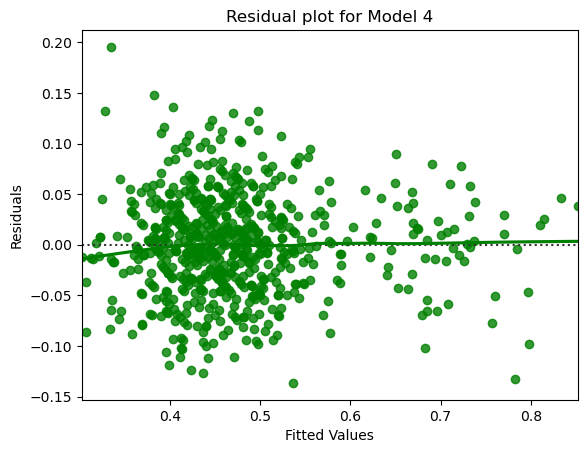

AIC: -2022.7178093554721
BIC: -1968.994141000796
checking model performance on train set.
      RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.05012  0.039397   0.774352        0.770101  8.819924
checking model performance on test set.
       RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.050238  0.040141   0.777499        0.769576  23.772465


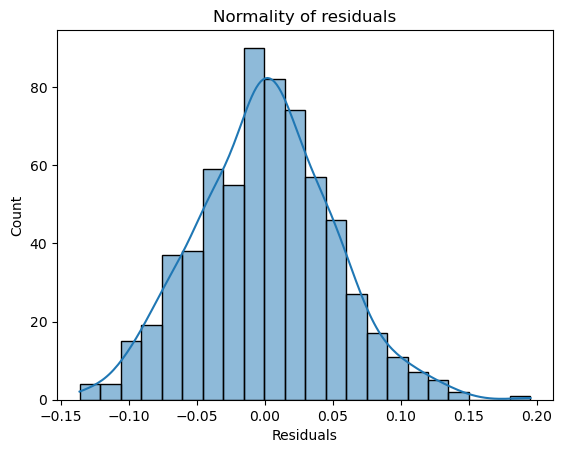

Shpiro Test
ShapiroResult(statistic=0.9970740875063351, pvalue=0.29531854004248004)


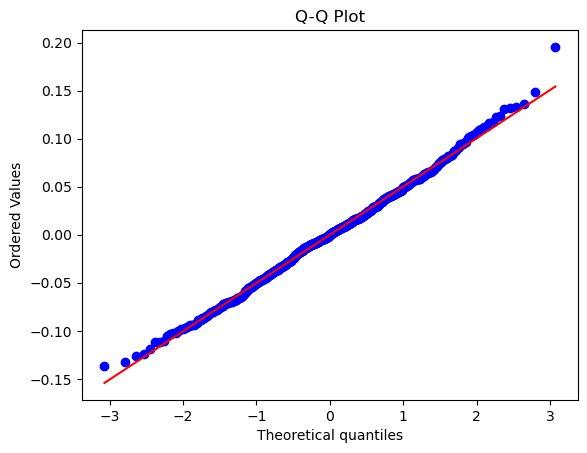

[('F statistic', 1.134106372772197), ('p-value', 0.13307820514551966)]


In [2473]:
x_train4 = x_train3.copy()
x_train4 = x_train4.drop('views_trailer',axis=1)
x_train4 = x_train4.reset_index(drop=True)
# Add constant to predictor variables
x_train4 = sm.add_constant(x_train4)
x_test4 = x_test3.copy()
x_test4 = x_test4.drop('views_trailer', axis=1)
x_test4 = x_test4.reset_index(drop=True)
# Add constant to predictor variables
x_test4 = sm.add_constant(x_test4)

model4 = sm.OLS(y_train, x_train4).fit()
print(model4.summary())
print(checking_vif(x_train4))
print_equation('View_counts',x_train4,model4)
data_for_test4 = pd.DataFrame({"Actual Values":y_train,"Fitted Values":model3.fittedvalues,"Residuals":model3.resid})
sns.residplot(data_for_test4, x="Fitted Values", y="Residuals", color="green", lowess=True)
plt.title('Residual plot for Model 4')
plt.savefig('Downloads/60.jpg')
plt.show()


# Access AIC and BIC
print("AIC:", model4.aic)
print("BIC:", model4.bic)
print('checking model performance on train set.')
model_train = model_performance_regression(model4,x_train4,y_train)
print(model_train)
print('checking model performance on test set.')
model_test = model_performance_regression(model4,x_test4,y_test)
print(model_test)
sns.histplot(data=data_for_test3, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.savefig('Downloads/61.jpg')
plt.show()
print('Shpiro Test')
print(stats.shapiro(data_for_test4["Residuals"]))
import pylab
import scipy.stats as stats
stats.probplot(data_for_test4["Residuals"], dist="norm", plot=pylab)
plt.title("Q-Q Plot")

plt.savefig('Downloads/62.jpg')
plt.show()
from statsmodels.stats.diagnostic import het_goldfeldquandt

# Perform the Goldfeld-Quandt test
test = het_goldfeldquandt(data_for_test4['Residuals'], x_train4)

# Pair the test results with labels
temp = ["F statistic", "p-value"]
test_results = list(zip(temp, test))
print(test_results)
